# imports

In [1]:
%%time 
from lib.project_functions import *
from project_functions.magical_functions import *

CPU times: total: 2.3 s
Wall time: 3.55 s


# Load data

## create fake data 

In [ ]:
%%time 
# import project_functions.fake_data as fd 
# data = fd.data_generation(size = 100, random_seed = 42)

## read fake data

In [2]:
# Read data from CSV file using selected columns and separator
data = pd.read_csv("data/input_data/Fake_data.csv")
print(data.shape)
data.sample(5)

(604, 9)


,Rodzaj klienta,Kod pocz.,Miasto,Ulica,Nr budynku,Typ pojemnika,Ilość poj.,Kod odpadu,Cykl odbiorów
80,BWC,05-090,Dawidy Bankowe,Starzyńskiego,30,L-120B,1,200108,3 wtorek
114,PR,96-321,Żabia Wola,Główna,27,L-1100K,1,200301,1 i 3 piątek
128,BHC,05-830,Walendów,Pąsowej Róży,32,L-120K,1,200301,4 piątek
572,BWC,05-090,Raszyn,"Puchały, Centralna",23,L-1100K,1,200301,2 i 4 wtorek
590,PW,96-316,Międzyborów,Partyzantów,10,L-240K,1,200301,co tydzień piątek


# Preprocessing data 

In [3]:
%%time 
preprocessing = Preprocessing()

data = preprocessing.main_for_route(data)
data = data.loc[~(data["Częstotliwość"] == "nan") & ~(data["Częstotliwość"] == "niestandardowe")]

print("data shape after preprocessing: ", data.shape)
data.sample(5)

data shape after preprocessing:  (1606, 41)
CPU times: total: 531 ms
Wall time: 536 ms


,Rodzaj klienta,Kod pocz.,Miasto,Ulica,Nr budynku,Ilość poj.,Kod odpadu,Pojemnosc,Cykl,Harmonogram,...,3Pt,3So,4Pn,4Wt,4Sr,4Cz,4Pt,4So,Częstotliwość,groups
1457,BRA,96-315,Cyganka,Francuska,17,1,200108_200201_200301,3150.0,co tydzień środa,1 raz w tygodniu,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2Sr,2Sr_B_200108_200201_200301
1134,BWA,01-747,Warszawa,Powązkowska,17,1,200108_200201_200301,495.0,poniedziałek czwartek sobota,3 razy w tygodniu,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,3So,3So_B_200108_200201_200301
718,BHC,05-555,Kotorydz,Piaseczyńska,27,1,200108_200201_200301,108.0,2 i 4 środa,2 razy w miesiącu,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2Sr,2Sr_B_200108_200201_200301
1054,BHA,05-840,Brwinów,"Moszna, Parcela",26,1,150107_200102,120.0,co tydzień piątek,1 raz w tygodniu,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2Pt,2Pt_B_150107_200102
932,BWC,05-532,Baniocha,Solec,6,1,200108_200201_200301,495.0,co tydzień poniedziałek,1 raz w tygodniu,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1Pn,1Pn_B_200108_200201_200301


# Traveling Salesman Problem

## genetic

In [ ]:
%%time 
gen_data, gen_stats = generate_routes( data,
                               solver_type='genetic', # "or_tools"
                               capacity=21000,
                               revert="all_info",
                               save=True,
                               col_name='groups',
                               map=True,
                               batch_size=45,
                             )

%pushbullet_notify "building routes using genetic is finished"

In [4]:
path = "data/routes/genetic_groups_2024-01-13/map/1Cz_B_150101_200201_map_rout_0.html"
IFrame(path, width=500, height=400)

## or_tools


In [ ]:
%%time 
or_data, or_stats = generate_routes( data,
                               solver_type='or_tools', # "genetic"
                               capacity=21000,
                               revert="all_info",
                               save=True,
                               col_name='groups',
                               map=True,
                               batch_size=45,
                             )

%pushbullet_notify "building routes using or_tools is finished"

In [5]:
path = "data/routes/or_tools_groups_2024-01-13/map/1Cz_B_150101_200201_map_rout_0.html"
IFrame(path, width=500, height=400)

## Statistics

In [6]:
gen_stats = pd.read_csv("data/routes/routs_statistics/groups_genetic_routs_statistics_2024-01-13.csv")
or_stats = pd.read_csv("data/routes/routs_statistics/groups_or_tools_routs_statistics_2024-01-13.csv")

In [7]:
stats = or_stats.merge(gen_stats, on= "group_name", suffixes = ("_or", "_gen"))
stats.sample(5)

,group_name,distance_or,volume_or,time_or,distance_gen,volume_gen,time_gen
74,nan_B_200108_200201_200301,82.0177,0.495,1.255472,82.0177,0.4950,1.255472
104,4Pt_B_150107_200102,62.7195,0.180,1.574278,62.7195,0.1800,1.574278
2,2Pt_B_200108_200201_200301,511.3203,19.566,11.376361,1025.4628,19.5660,20.178778
70,2Sr_B_150102_150106_150104_200139,105.1557,3.599,3.226250,114.7110,3.6000,3.573639
34,2Pt_B_150102_150106_150104_200139,168.7200,3.041,4.314250,210.4557,3.0465,5.249444


In [8]:
new_order  = ['group_name', 'distance_or', 'distance_gen', 'time_or', 'time_gen', 'volume_or', 'volume_gen']
stats = stats[new_order]
stat_describe = stats.describe()
stat_describe

,distance_or,distance_gen,time_or,time_gen,volume_or,volume_gen
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,144.998822,248.525254,3.285801,5.219947,4.963388,4.964316
std,124.499228,311.553057,2.370779,6.021613,7.071200,7.071278
min,24.336600,24.336600,0.758639,0.758639,0.032000,0.032400
25%,70.102000,67.222500,1.547465,1.517833,0.528750,0.528750
50%,113.263250,120.823650,2.607292,2.627444,1.680000,1.681500
75%,174.439925,282.668900,3.863771,6.440764,5.055250,5.059350
max,712.588600,1370.559600,11.376361,24.991583,22.698000,22.698000


# Knapsack Problem

## To create a new schedule based on the travel schedule provided by the user и

In [ ]:
%%time 
fet = FillingEmptyTransport( data,
                             column='groups',
                             capacity=21000,
                             acceptable_shortfalls=0.1,
                             acceptable_excess=0.1,
                             verbose=False,
                            )


new_data = fet.solver_filling()

%pushbullet_notify "fet.solver_filling completed!"

new_data.sample(5)

In [ ]:
new_data.to_csv("data/input_data/filling_empty_transport/data_after_filling_gaps.csv", index= False)

In [9]:
new_data = pd.read_csv("data/input_data/filling_empty_transport/data_after_filling_gaps.csv")

## days that were excluded due to postponement

In [10]:
check_frequency_difference(new_data)

Values not in new_frequency: ['1Cz_UP_150101_200201' '1Pn_P_150102_150106_150104_200139'
 '1Pt_B_150107_200102' '1Pt_P_150107_200102' '1Pt_P_200108_200201_200301'
 '1Wt_P_150101_200201' '1Wt_P_200108_200201_200301'
 '2Pn_P_150102_150106_150104_200139' '2Pt_P_200108_200201_200301'
 '2Sr_P_150107_200102' '2Wt_P_150101_200201' '2Wt_P_200108_200201_200301'
 '3Pn_P_150102_150106_150104_200139' '3Pt_B_150107_200102'
 '3Pt_P_200108_200201_200301' '3Wt_P_150101_200201'
 '3Wt_P_200108_200201_200301' '4Pn_P_150102_150106_150104_200139'
 '4Pt_B_150107_200102' '4Pt_P_150107_200102' '4Pt_P_200108_200201_200301'
 '4Wt_B_150101_200201' '4Wt_P_200108_200201_200301']


# Traveling Salesman Problem

## New travel schedule based on the KnapsackScheduleFiller class

## genetic

In [ ]:
%%time 
new_gen_data, new_gen_stats = generate_routes( new_data,
                               solver_type='genetic', # "or_tools"
                               capacity=21000,
                               revert="all_info",
                               save=True,
                               col_name='new_frequency',
                               map=True,
                               batch_size=45,
                             )

%pushbullet_notify "building routes using genetic is finished"

In [11]:
path = "data/routes/genetic_new_frequency_2024-01-14/map/1Cz_B_150101_200201_map_rout_0.html"
IFrame(path, width=500, height=400)

## or_tools

In [ ]:
%%time 
new_or_data, new_or_stats = generate_routes( new_data,
                               solver_type='or_tools', # "genetic"
                               capacity=21000,
                               revert="all_info",
                               save=True,
                               col_name='new_frequency',
                               map=True,
                               batch_size=45,
                             )

%pushbullet_notify "building routes using or_tools is finished"

In [12]:
path = "data/routes/or_tools_new_frequency_2024-01-14/map/1Cz_B_150101_200201_map_rout_0.html"
IFrame(path, width=500, height=400)

## Statistics

In [13]:
new_gen_stats = pd.read_csv("data/routes/routs_statistics/new_frequency_genetic_routs_statistics_2024-01-14.csv")
new_or_stats = pd.read_csv("data/routes/routs_statistics/new_frequency_or_tools_routs_statistics_2024-01-14.csv")

In [14]:
new_stats = new_or_stats.merge(new_gen_stats, on= "group_name", suffixes = ("_or", "_gen"))
new_stats.sample(5)

,group_name,distance_or,volume_or,time_or,distance_gen,volume_gen,time_gen
66,1Wt_B_150101_200201,145.7416,1.147,3.608167,142.1494,1.1502,3.675250
85,3Sr_B_40209,60.5157,1.100,1.030583,60.5157,1.1000,1.030583
88,3Wt_B_200101_150101,65.7894,0.032,1.102500,65.7894,0.0324,1.102500
72,1Pn_P_200108_200201_200301,95.0047,0.495,1.474722,95.0047,0.4950,1.474722
56,1Wt_B_150102_150106_150104_200139,544.8904,1.536,8.724528,544.8904,1.5390,8.724528


In [15]:
new_order  = ['group_name', 'distance_or', 'distance_gen', 'time_or', 'time_gen', 'volume_or', 'volume_gen']
new_stats = new_stats[new_order]
new_stat_describe = new_stats.describe()
new_stat_describe

,distance_or,distance_gen,time_or,time_gen,volume_or,volume_gen
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,174.435690,292.037349,4.264087,6.125152,6.441360,6.442570
std,126.443614,319.442705,2.726991,5.997108,7.997194,7.997158
min,38.484900,36.120300,1.030583,1.030583,0.032000,0.032400
25%,95.004700,95.004700,2.353889,2.452056,1.147000,1.150200
50%,130.964000,143.485000,3.456889,3.548278,2.752000,2.754000
75%,189.778200,392.585100,5.770972,7.832833,8.397000,8.401500
max,710.735900,1587.815800,11.848444,26.110167,34.227000,34.227000


# Full statistics

In [16]:
col_name = {'distance_or' : "old_distance_or", 
            'distance_gen' : "old_distance_gen", 
            'time_or' : "old_time_or", 
            'time_gen' : "old_time_gen", 
            'volume_or' : "old_volume_or",
            'volume_gen' : "old_volume_gen",
           }
stat_describe = stat_describe.rename(columns= col_name)

col_name = {'distance_or' : "new_distance_or", 
            'distance_gen' : "new_distance_gen", 
            'time_or' : "new_time_or", 
            'time_gen' : "new_time_gen", 
            'volume_or' : "new_volume_or",
            'volume_gen' : "new_volume_gen",
           }
new_stat_describe = new_stat_describe.rename(columns= col_name)


In [17]:
new_order  = ['old_distance_or', 'new_distance_or', 'old_distance_gen', 'new_distance_gen',
              'old_time_or', 'new_time_or', 'old_time_gen', 'new_time_gen', 
              'old_volume_or', 'new_volume_or', 'old_volume_gen', 'new_volume_gen', 
             ]

full_statistics = pd.concat([stat_describe, new_stat_describe], axis= 1)[new_order]
full_statistics

,old_distance_or,new_distance_or,old_distance_gen,new_distance_gen,old_time_or,new_time_or,old_time_gen,new_time_gen,old_volume_or,new_volume_or,old_volume_gen,new_volume_gen
count,116.000000,89.000000,116.000000,89.000000,116.000000,89.000000,116.000000,89.000000,116.000000,89.000000,116.000000,89.000000
mean,144.998822,174.435690,248.525254,292.037349,3.285801,4.264087,5.219947,6.125152,4.963388,6.441360,4.964316,6.442570
std,124.499228,126.443614,311.553057,319.442705,2.370779,2.726991,6.021613,5.997108,7.071200,7.997194,7.071278,7.997158
min,24.336600,38.484900,24.336600,36.120300,0.758639,1.030583,0.758639,1.030583,0.032000,0.032000,0.032400,0.032400
25%,70.102000,95.004700,67.222500,95.004700,1.547465,2.353889,1.517833,2.452056,0.528750,1.147000,0.528750,1.150200
50%,113.263250,130.964000,120.823650,143.485000,2.607292,3.456889,2.627444,3.548278,1.680000,2.752000,1.681500,2.754000
75%,174.439925,189.778200,282.668900,392.585100,3.863771,5.770972,6.440764,7.832833,5.055250,8.397000,5.059350,8.401500
max,712.588600,710.735900,1370.559600,1587.815800,11.376361,11.848444,24.991583,26.110167,22.698000,34.227000,22.698000,34.227000


# Visualization 

In [18]:
vks = VisualizerDataFilling()

In [19]:
# Create a pivot table from the 'changed_schedule' DataFrame
sum_waste_capacity_groups = pd.pivot_table(new_data,
                                           # changed_schedule,  
                                           index="Kod odpadu",
                                           columns="Częstotliwość",
                                           values="Pojemnosc",
                                           aggfunc="sum",
                                           fill_value=0,
                                           margins=True,
                                           sort=True,
                                          )


# Apply custom styling to the pivot table
custom_style_pivot_table(sum_waste_capacity_groups, sorted_by= 'd')

Częstotliwość,1Pn,2Pn,3Pn,4Pn,1Wt,2Wt,3Wt,4Wt,1Sr,2Sr,3Sr,4Sr,1Cz,2Cz,3Cz,4Cz,1Pt,2Pt,3Pt,4Pt,1So,2So,3So,4So,All
Kod odpadu,,,,,,,,,,,,,,,,,,,,,,,,,
150101_200201,1782.000000,2111.400000,1782.000000,2111.400000,1328.400000,2079.000000,1593.000000,2154.600000,3704.400000,1890.000000,4098.600000,2019.600000,5033.700000,5441.400000,5122.800000,5209.200000,5005.800000,5603.400000,5038.200000,6624.000000,0.000000,0.000000,0.000000,0.000000,69732.900000
150102_150106_150104_200139,8649.000000,9693.000000,8347.500000,10134.000000,1539.000000,1179.000000,1318.500000,1399.500000,2997.000000,3600.000000,3024.000000,3712.500000,2205.000000,2754.000000,2151.000000,2506.500000,1593.000000,3046.500000,1593.000000,2799.000000,0.000000,0.000000,0.000000,0.000000,74241.000000
150107_200102,240.000000,240.000000,240.000000,300.000000,0.000000,0.000000,0.000000,0.000000,970.000000,1090.000000,1030.000000,600.000000,790.000000,1770.000000,910.000000,1950.000000,910.000000,120.000000,850.000000,240.000000,0.000000,0.000000,0.000000,0.000000,12250.000000
200101_150101,0.000000,0.000000,0.000000,0.000000,32.400000,0.000000,32.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.800000
200108_200201_200301,18391.500000,21870.000000,19089.000000,22365.000000,16258.500000,19476.000000,16461.000000,19530.000000,22698.000000,19881.000000,22590.000000,19224.000000,22068.000000,21879.000000,22068.000000,22320.000000,18756.000000,20718.000000,18810.000000,22527.000000,1980.000000,1980.000000,1980.000000,1980.000000,414900.000000
40209,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1100.000000,0.000000,1100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2200.000000
All,29062.500000,33914.400000,29458.500000,34910.400000,19158.300000,22734.000000,19404.900000,23084.100000,31469.400000,26461.000000,31842.600000,25556.100000,30096.700000,31844.400000,30251.800000,31985.700000,26264.800000,29487.900000,26291.200000,32190.000000,1980.000000,1980.000000,1980.000000,1980.000000,573388.700000


In [20]:
custom_style_pivot_table(sum_waste_capacity_groups, sorted_by= 'w')


Częstotliwość,1Cz,1Pn,1Pt,1So,1Sr,1Wt,2Cz,2Pn,2Pt,2So,2Sr,2Wt,3Cz,3Pn,3Pt,3So,3Sr,3Wt,4Cz,4Pn,4Pt,4So,4Sr,4Wt,All
Kod odpadu,,,,,,,,,,,,,,,,,,,,,,,,,
150101_200201,5033.700000,1782.000000,5005.800000,0.000000,3704.400000,1328.400000,5441.400000,2111.400000,5603.400000,0.000000,1890.000000,2079.000000,5122.800000,1782.000000,5038.200000,0.000000,4098.600000,1593.000000,5209.200000,2111.400000,6624.000000,0.000000,2019.600000,2154.600000,69732.900000
150102_150106_150104_200139,2205.000000,8649.000000,1593.000000,0.000000,2997.000000,1539.000000,2754.000000,9693.000000,3046.500000,0.000000,3600.000000,1179.000000,2151.000000,8347.500000,1593.000000,0.000000,3024.000000,1318.500000,2506.500000,10134.000000,2799.000000,0.000000,3712.500000,1399.500000,74241.000000
150107_200102,790.000000,240.000000,910.000000,0.000000,970.000000,0.000000,1770.000000,240.000000,120.000000,0.000000,1090.000000,0.000000,910.000000,240.000000,850.000000,0.000000,1030.000000,0.000000,1950.000000,300.000000,240.000000,0.000000,600.000000,0.000000,12250.000000
200101_150101,0.000000,0.000000,0.000000,0.000000,0.000000,32.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.800000
200108_200201_200301,22068.000000,18391.500000,18756.000000,1980.000000,22698.000000,16258.500000,21879.000000,21870.000000,20718.000000,1980.000000,19881.000000,19476.000000,22068.000000,19089.000000,18810.000000,1980.000000,22590.000000,16461.000000,22320.000000,22365.000000,22527.000000,1980.000000,19224.000000,19530.000000,414900.000000
40209,0.000000,0.000000,0.000000,0.000000,1100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2200.000000
All,30096.700000,29062.500000,26264.800000,1980.000000,31469.400000,19158.300000,31844.400000,33914.400000,29487.900000,1980.000000,26461.000000,22734.000000,30251.800000,29458.500000,26291.200000,1980.000000,31842.600000,19404.900000,31985.700000,34910.400000,32190.000000,1980.000000,25556.100000,23084.100000,573388.700000


C:\Users\Alex\Desktop\dla_git\Optymalizacja_Tras_Smieciarek_dla_git\project_functions\visualization.py:58: UserWarning: 
The palette list has fewer values (20) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


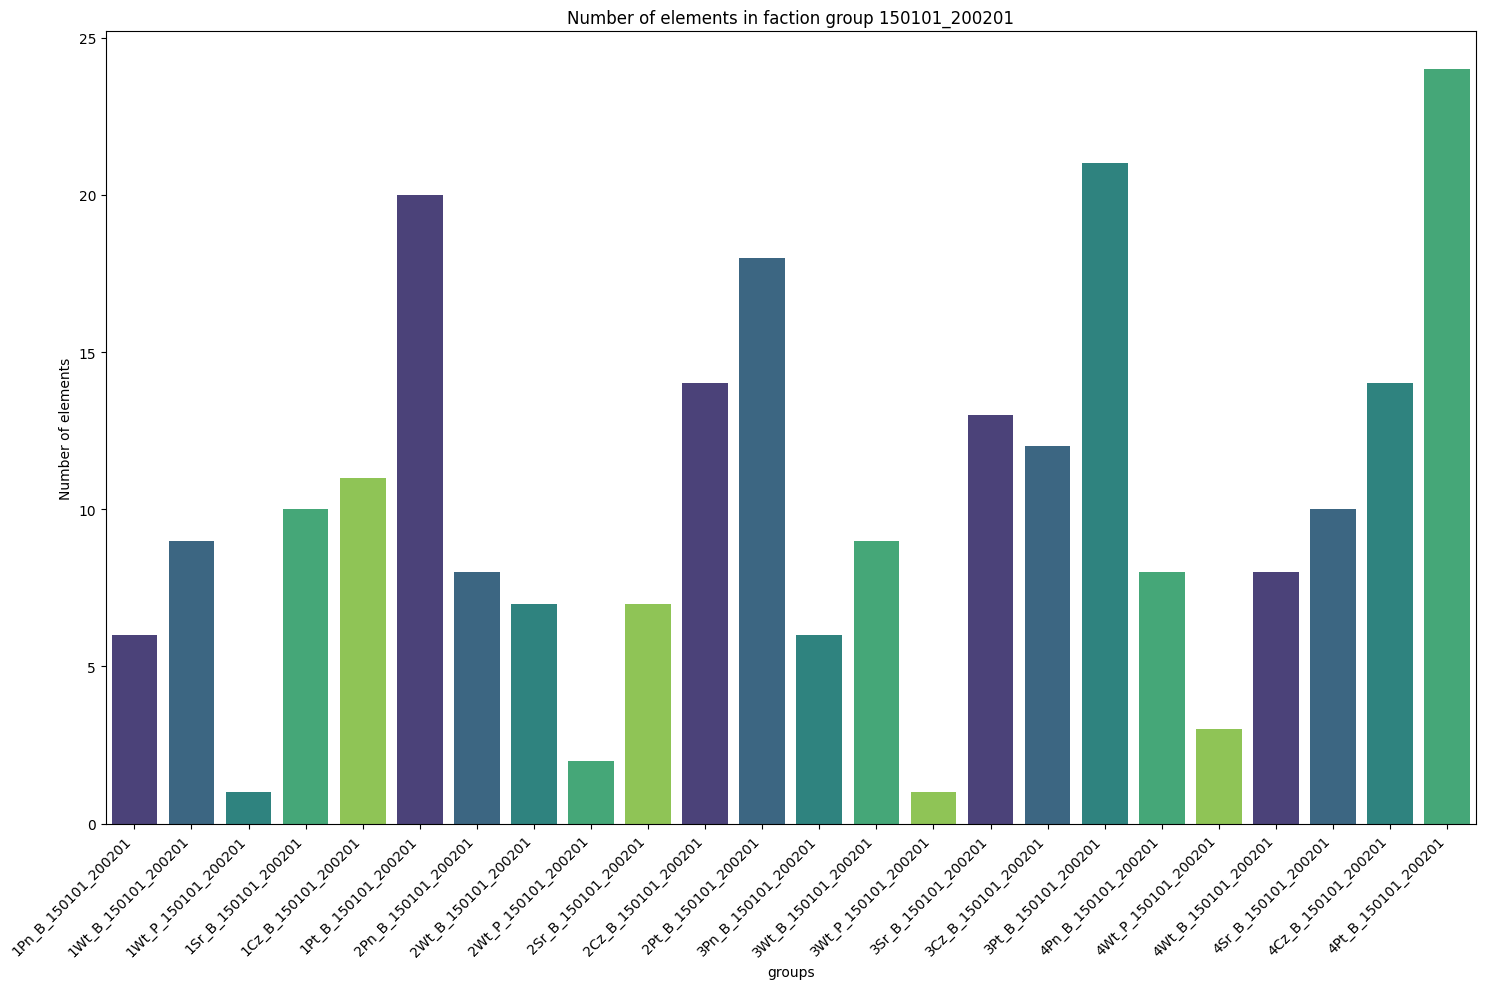

C:\Users\Alex\Desktop\dla_git\Optymalizacja_Tras_Smieciarek_dla_git\project_functions\visualization.py:58: UserWarning: 
The palette list has fewer values (20) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


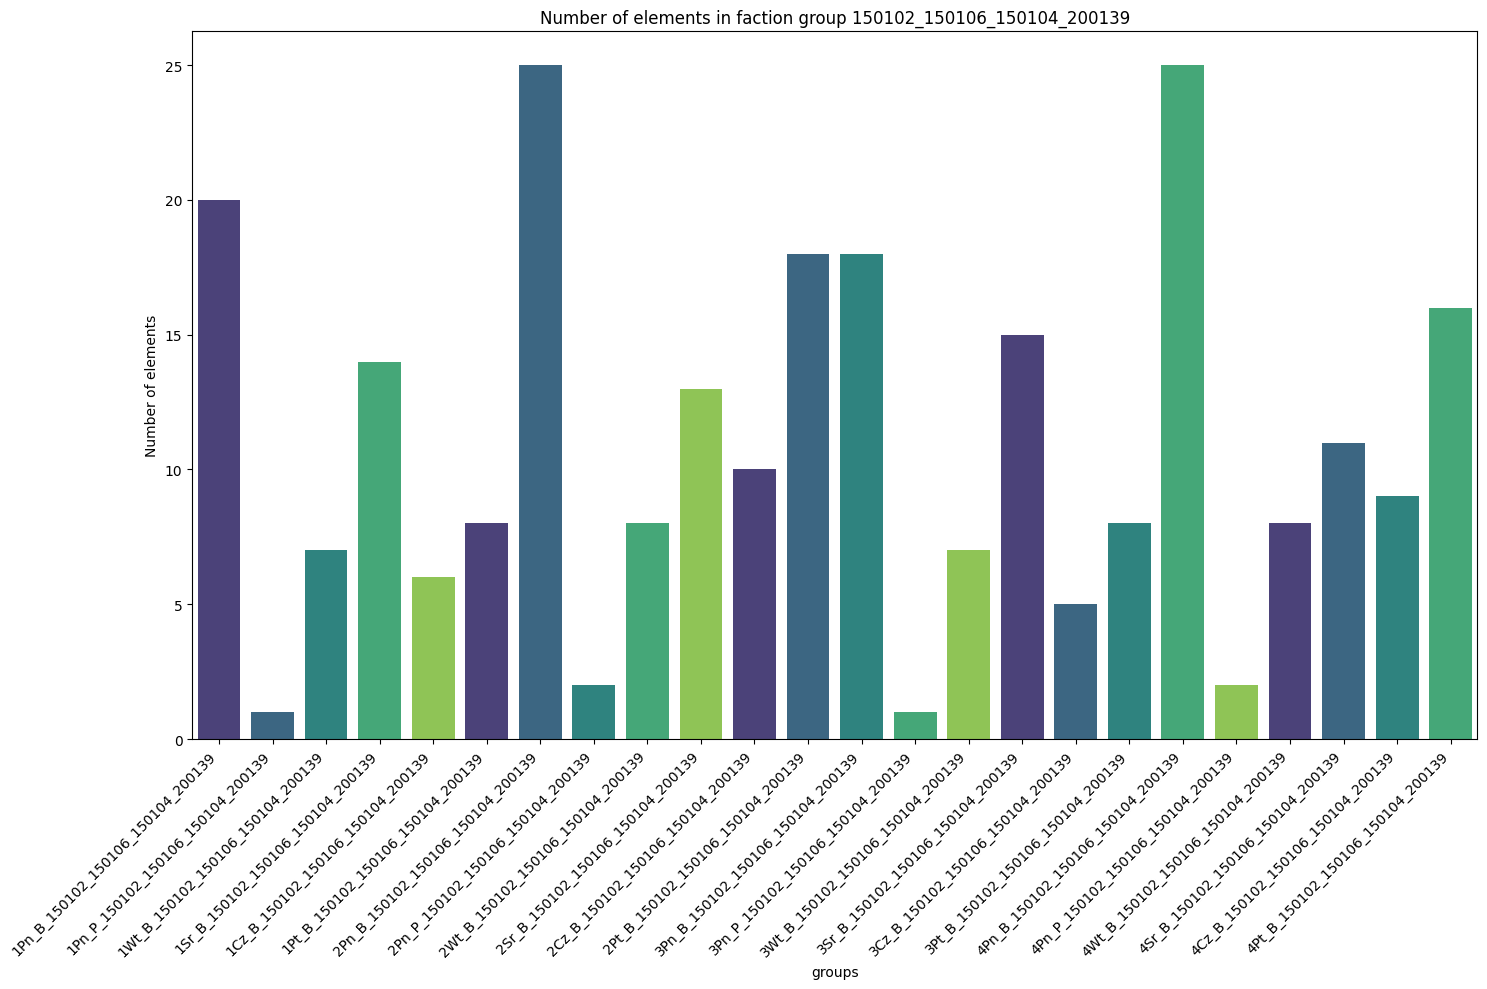

C:\Users\Alex\Desktop\dla_git\Optymalizacja_Tras_Smieciarek_dla_git\project_functions\visualization.py:58: UserWarning: 
The palette list has fewer values (16) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


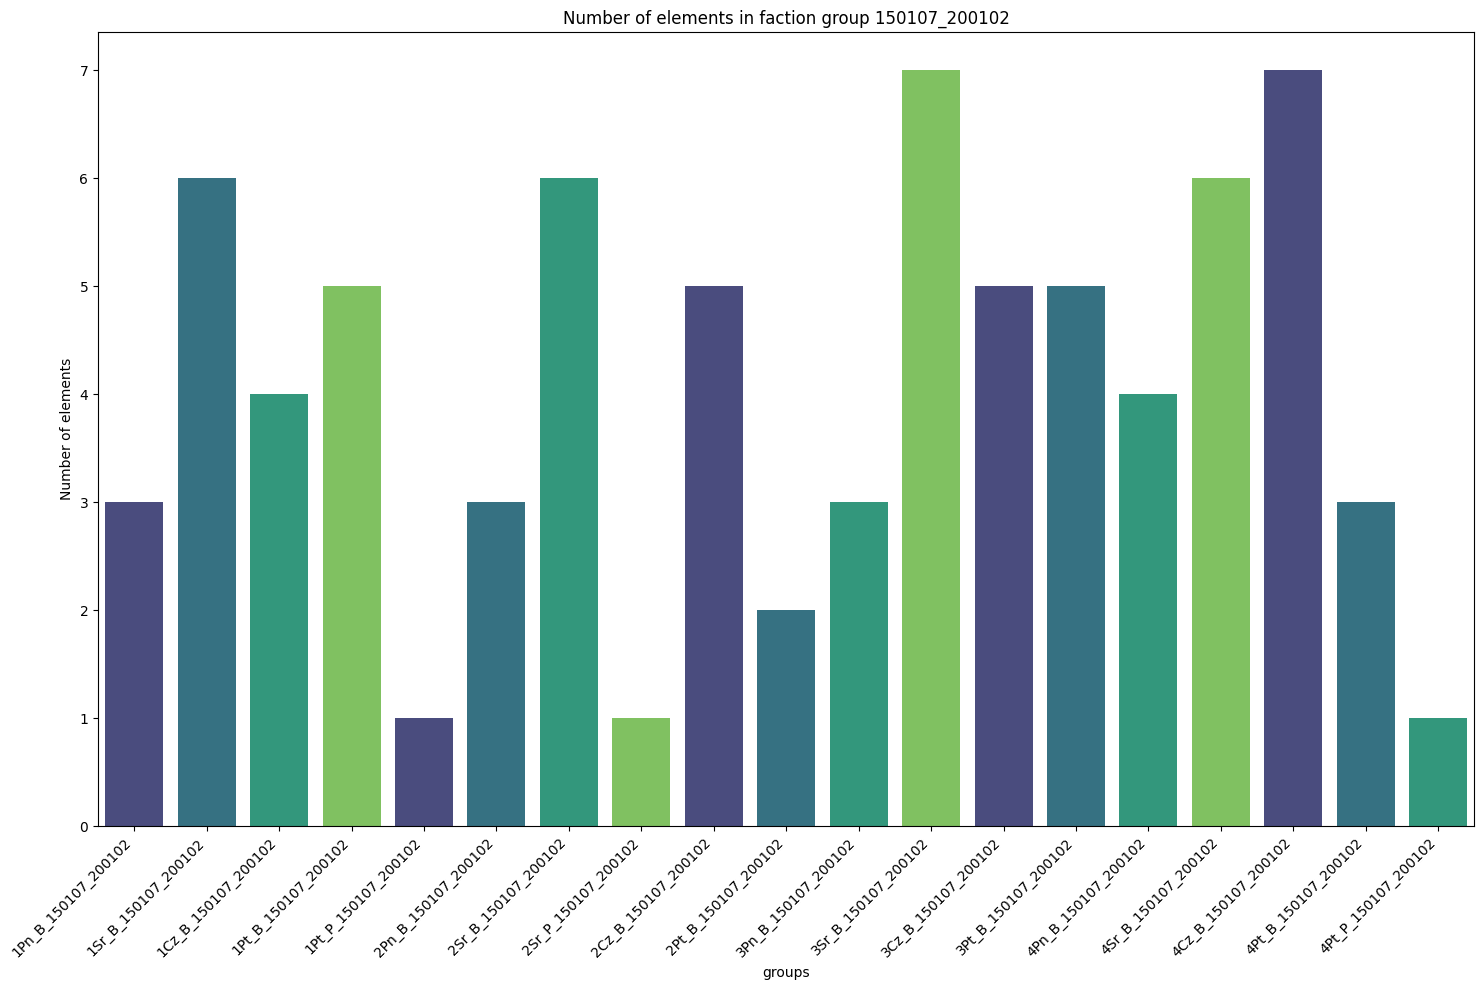

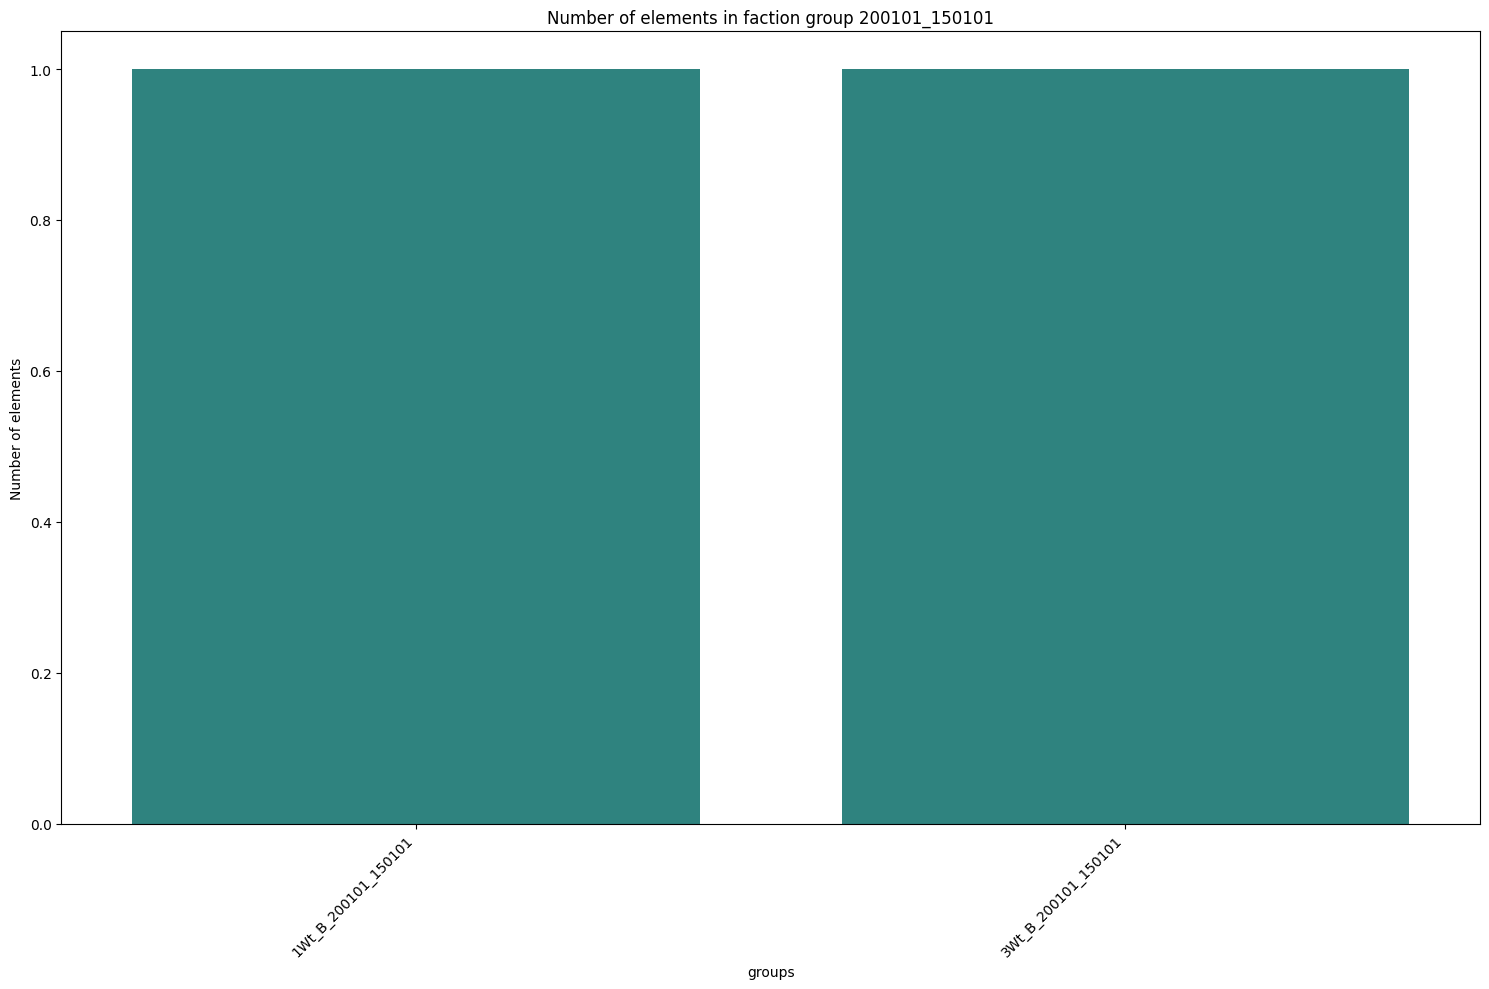

C:\Users\Alex\Desktop\dla_git\Optymalizacja_Tras_Smieciarek_dla_git\project_functions\visualization.py:58: UserWarning: 
The palette list has fewer values (24) than needed (40) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


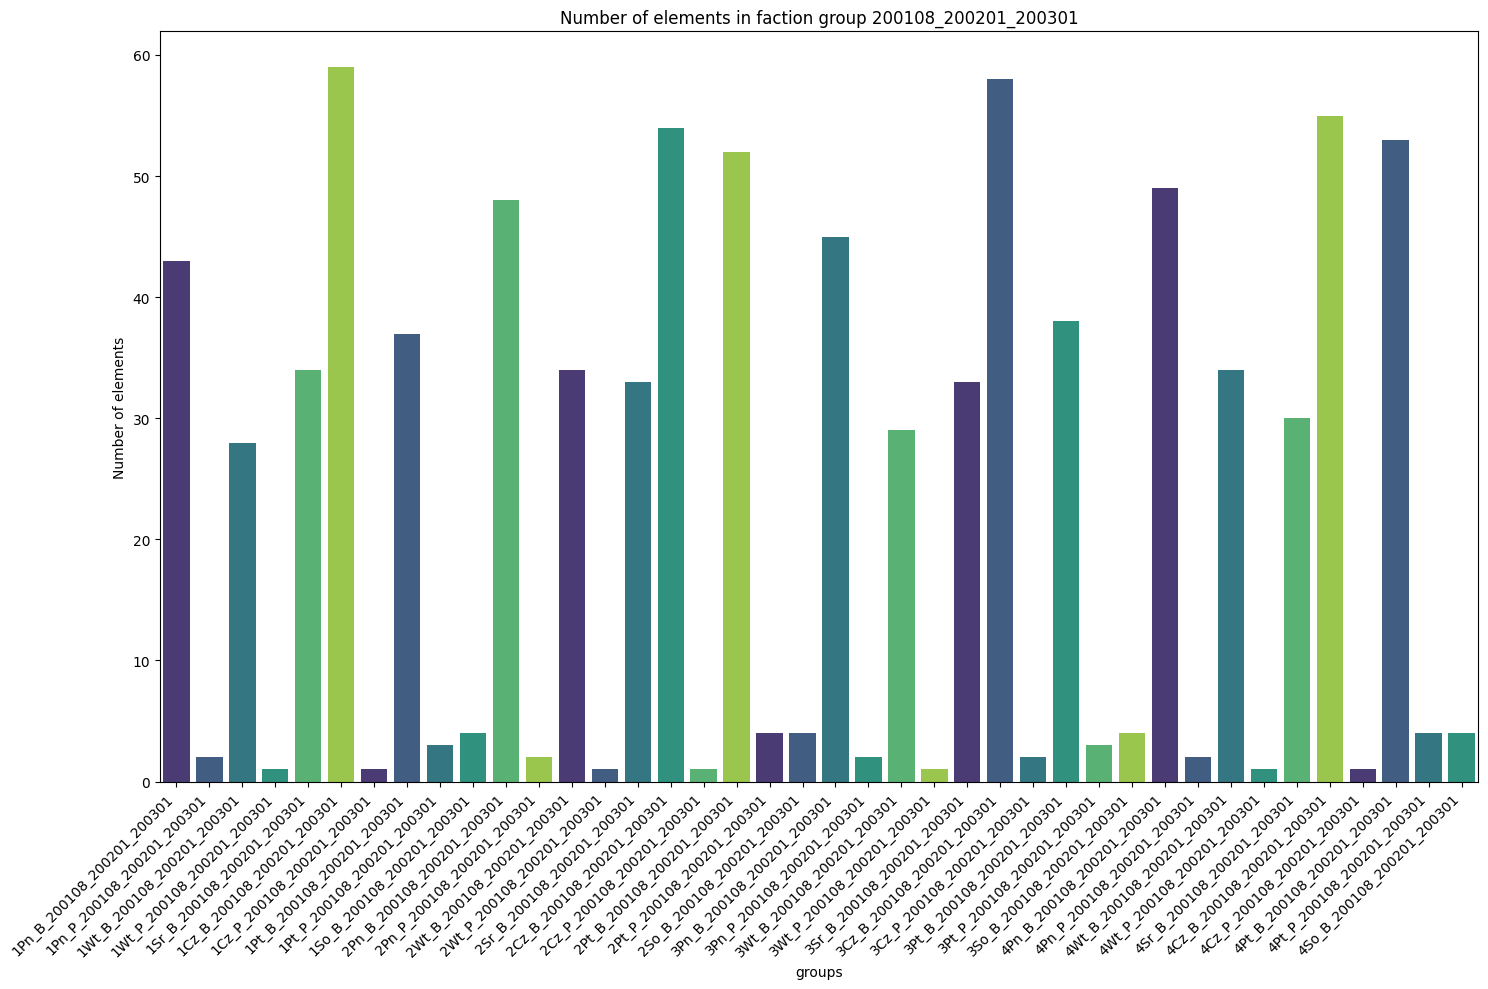

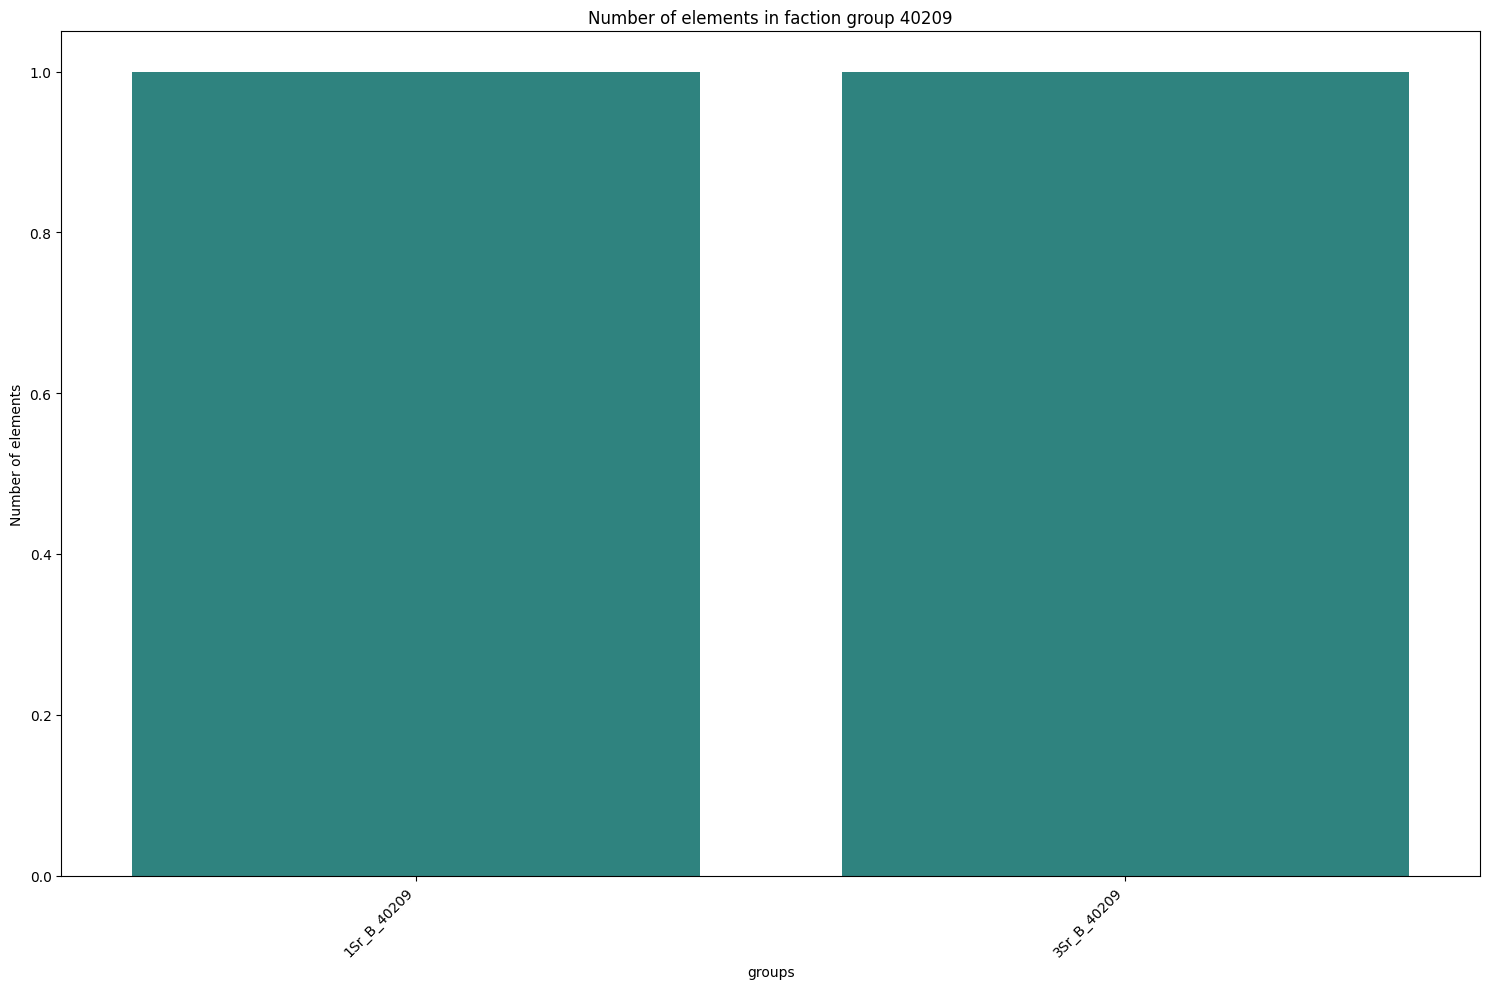

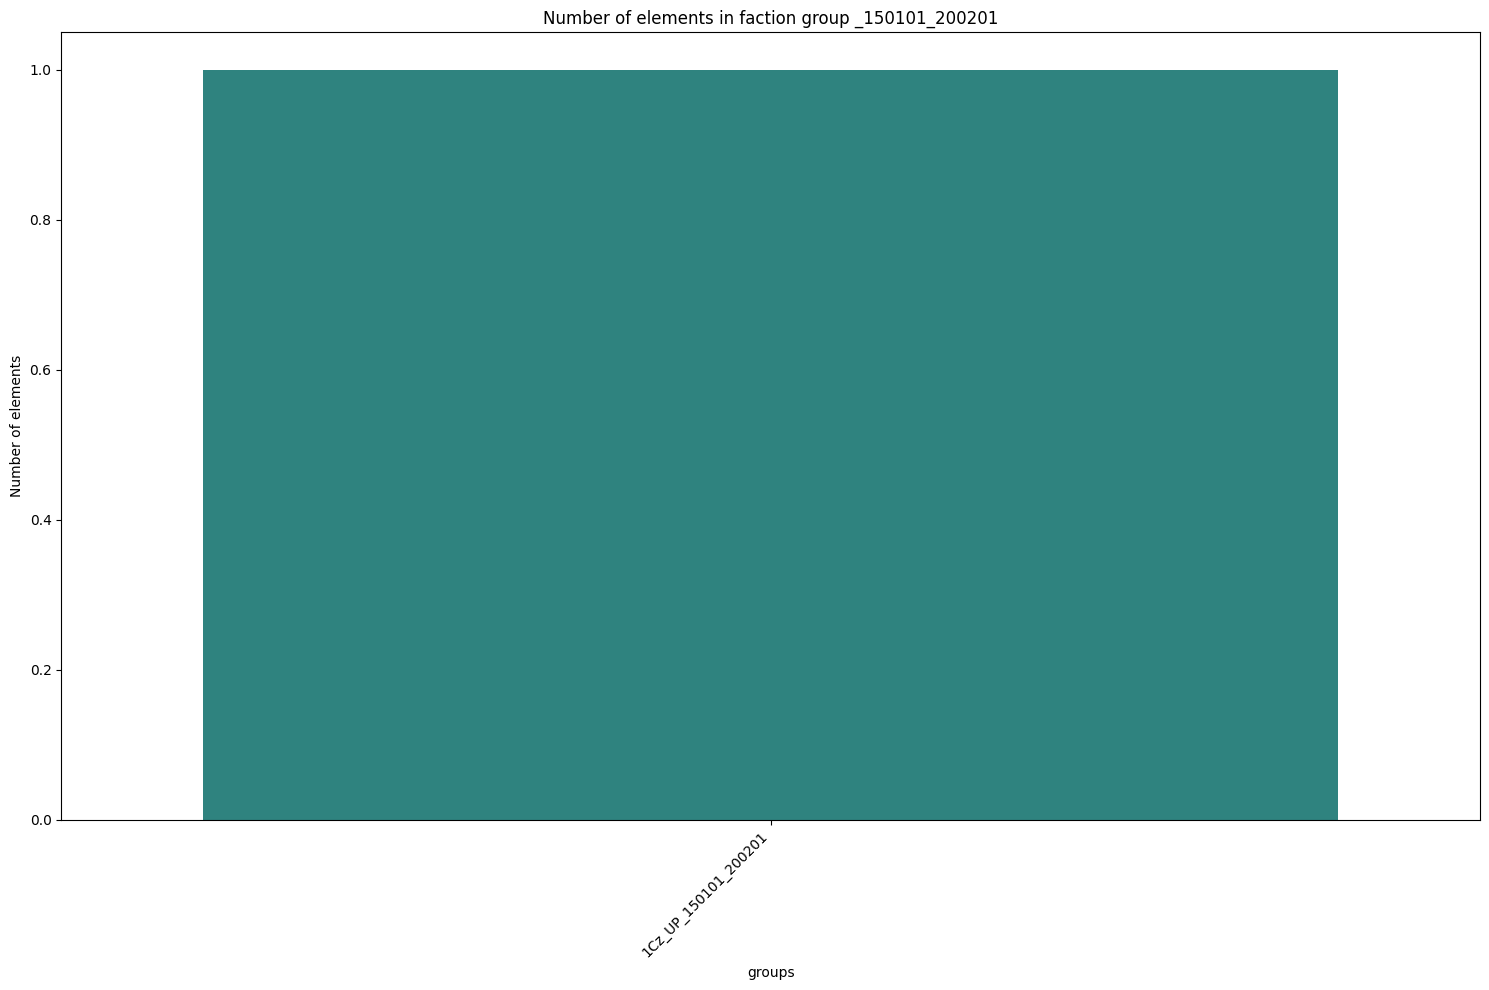

In [21]:
vks.plot_faction(new_data)

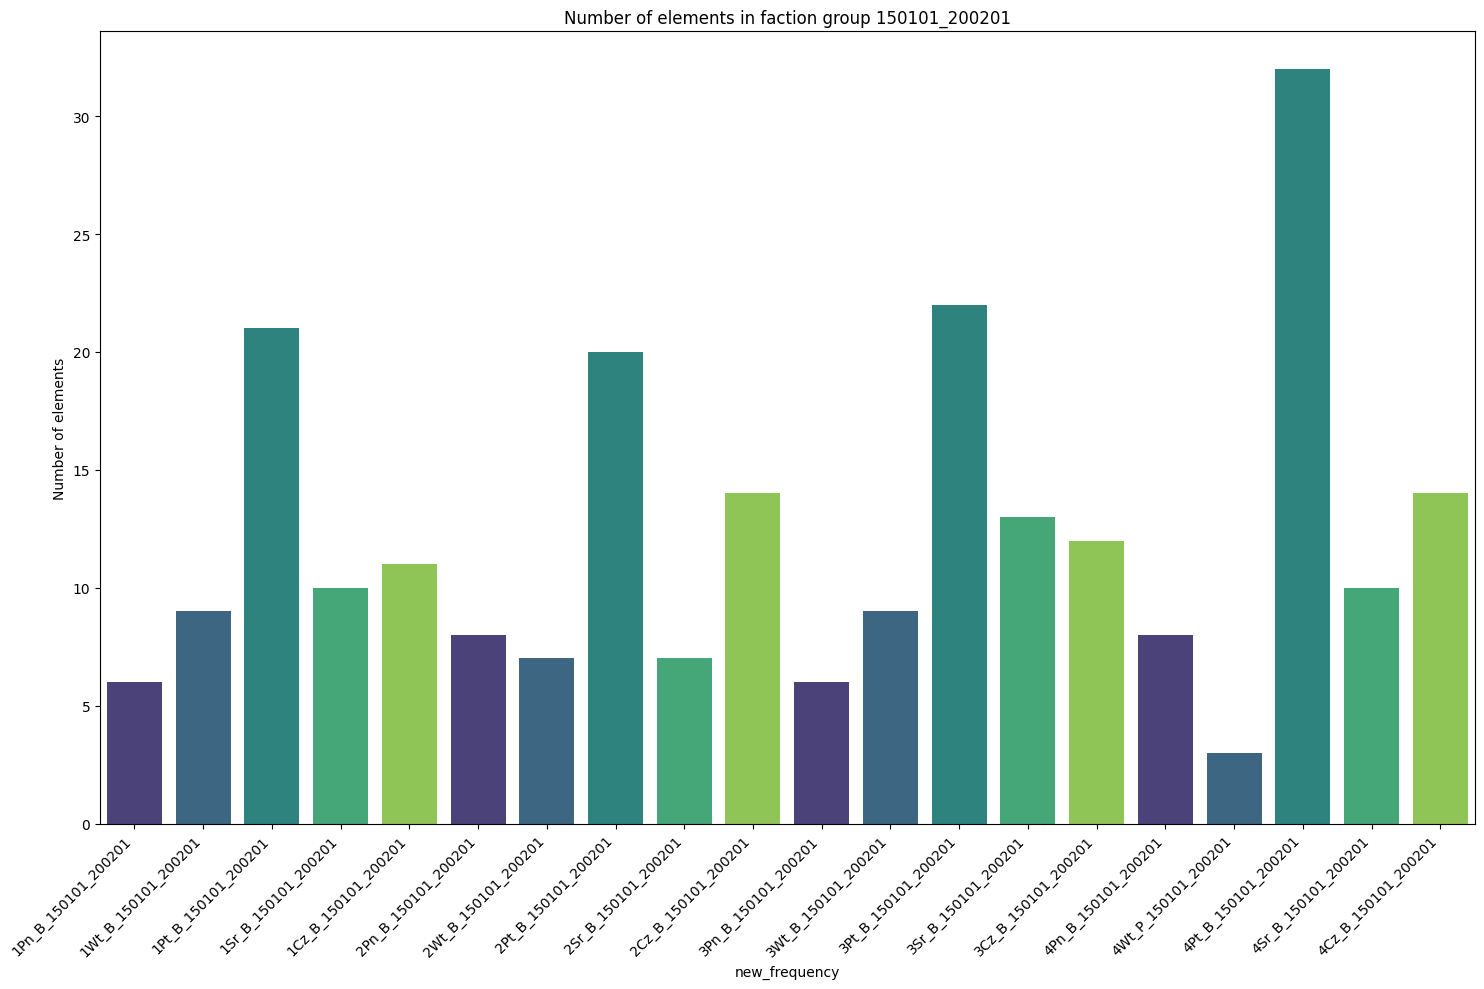

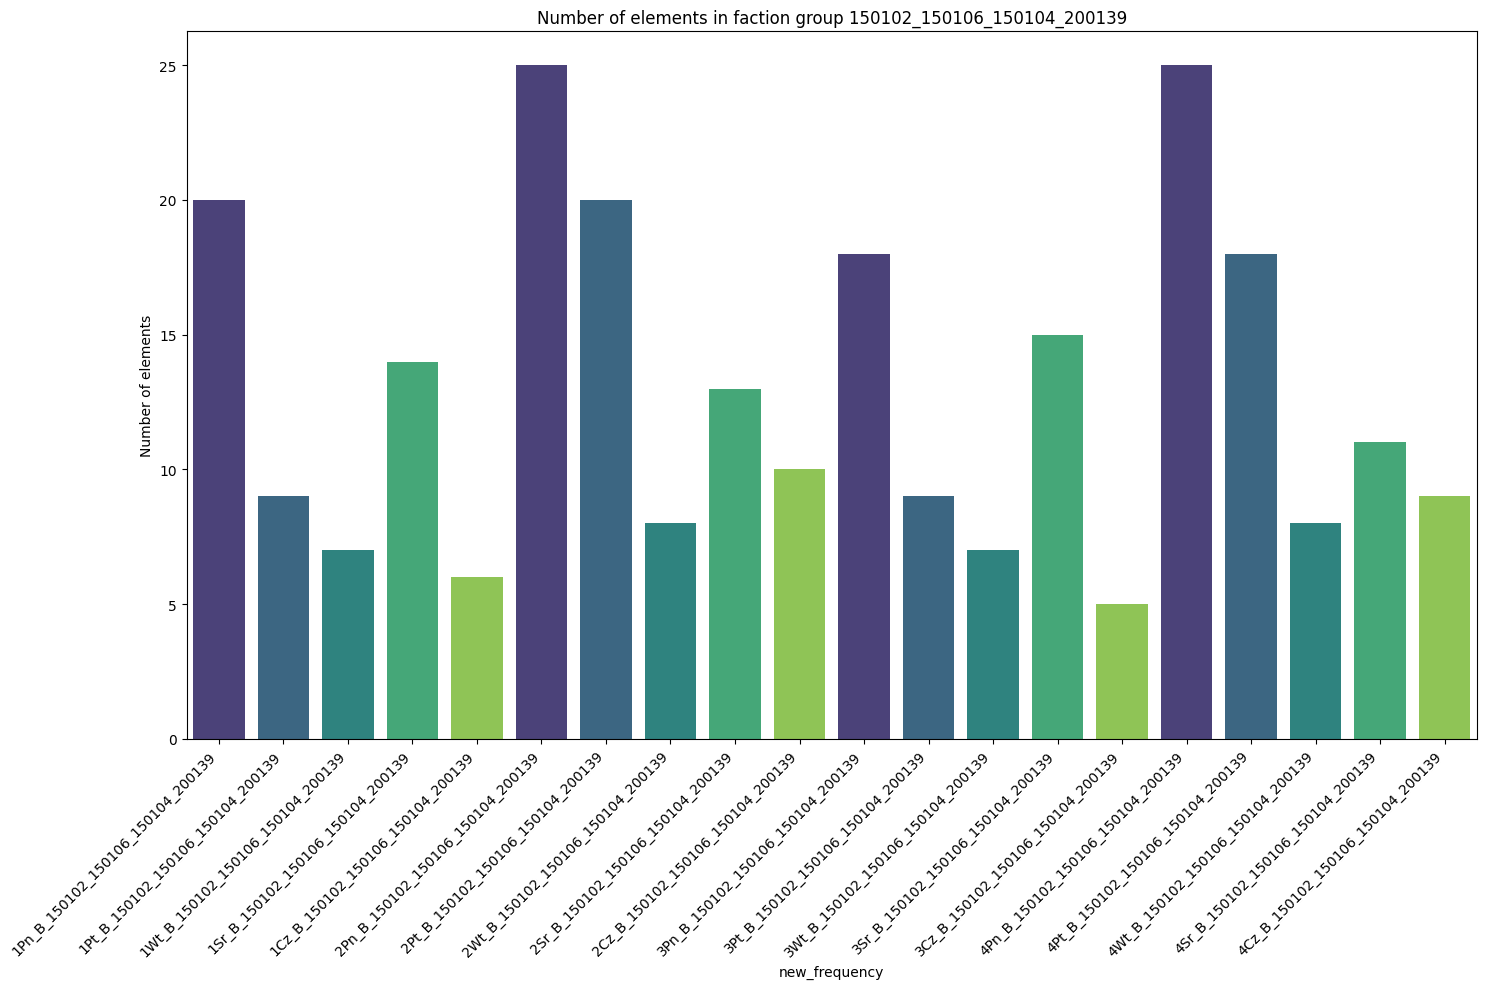

C:\Users\Alex\Desktop\dla_git\Optymalizacja_Tras_Smieciarek_dla_git\project_functions\visualization.py:58: UserWarning: The palette list has more values (16) than needed (13), which may not be intended.
  sns.barplot(


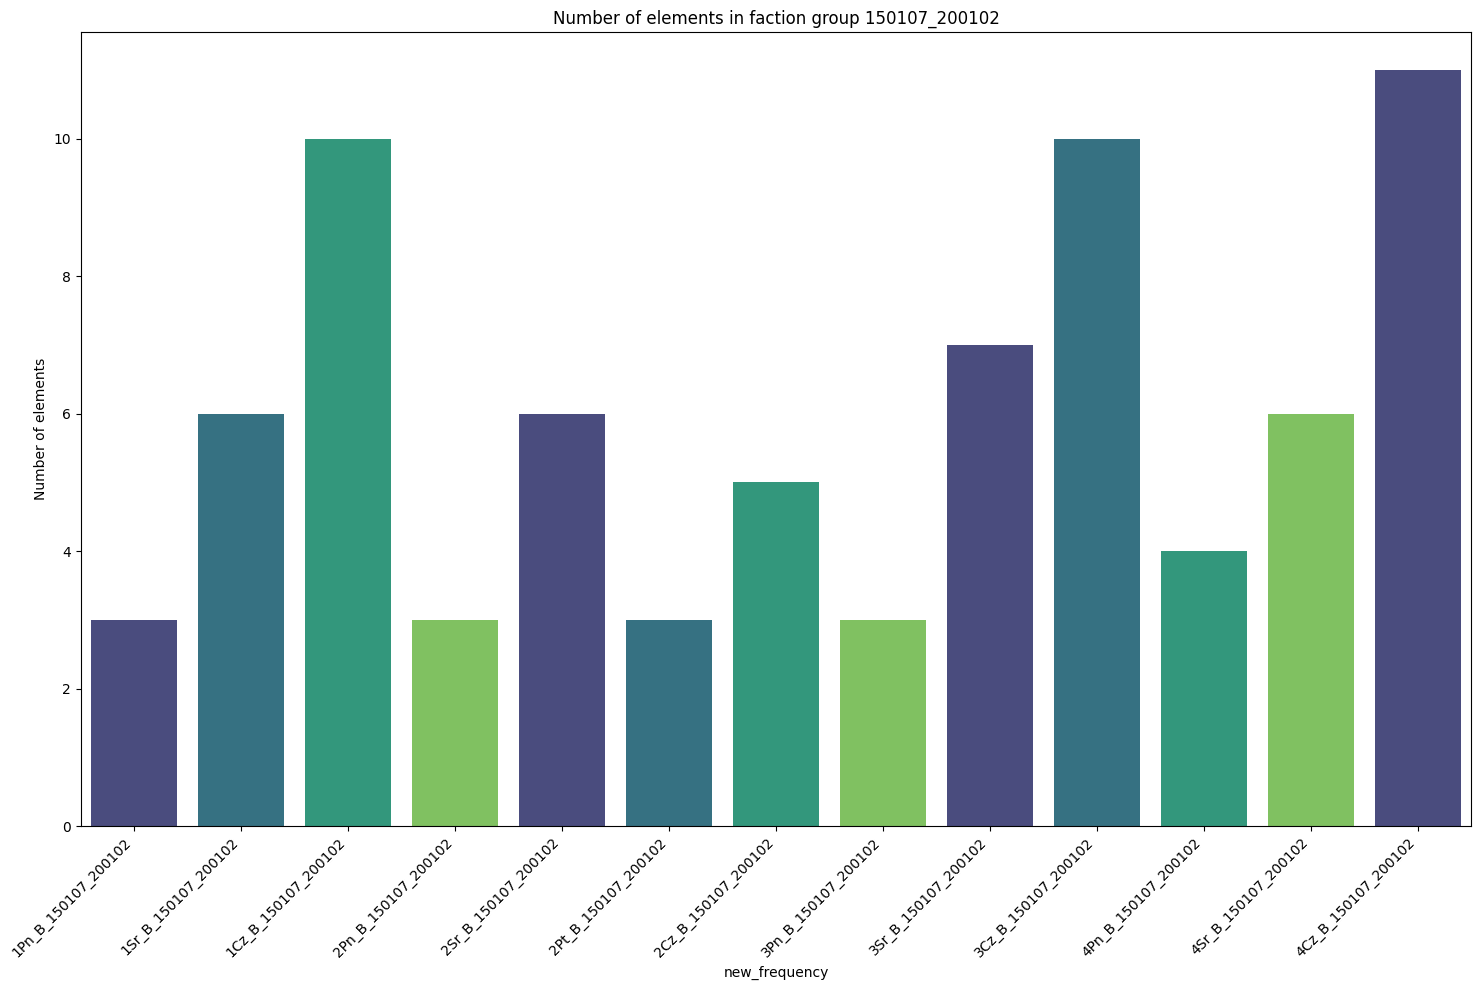

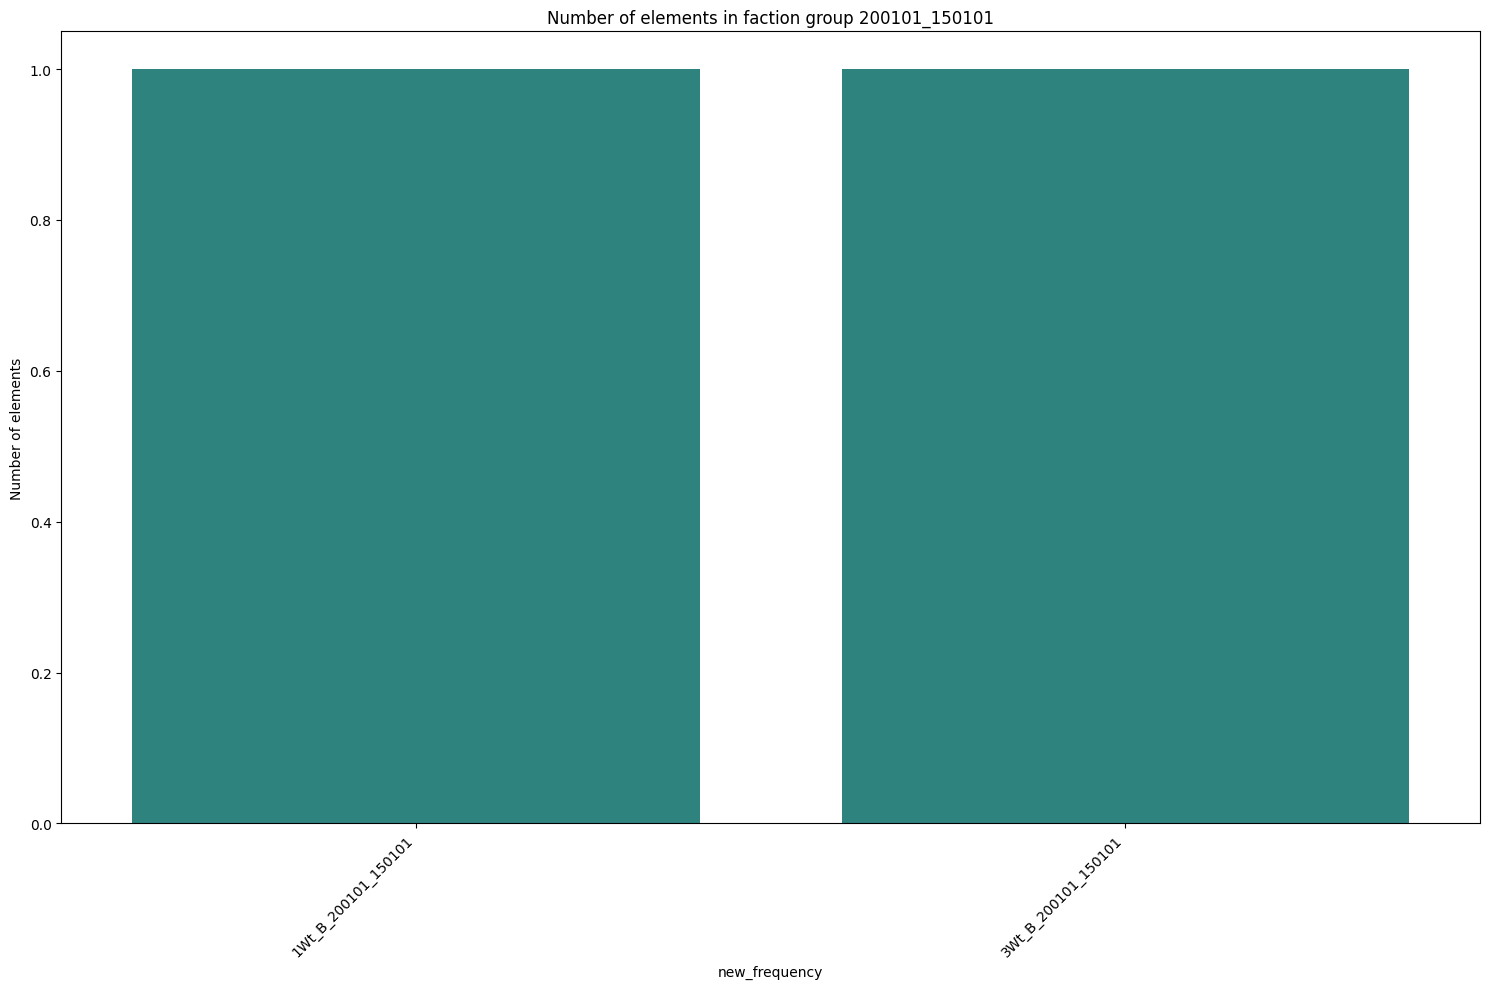

C:\Users\Alex\Desktop\dla_git\Optymalizacja_Tras_Smieciarek_dla_git\project_functions\visualization.py:58: UserWarning: 
The palette list has fewer values (24) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


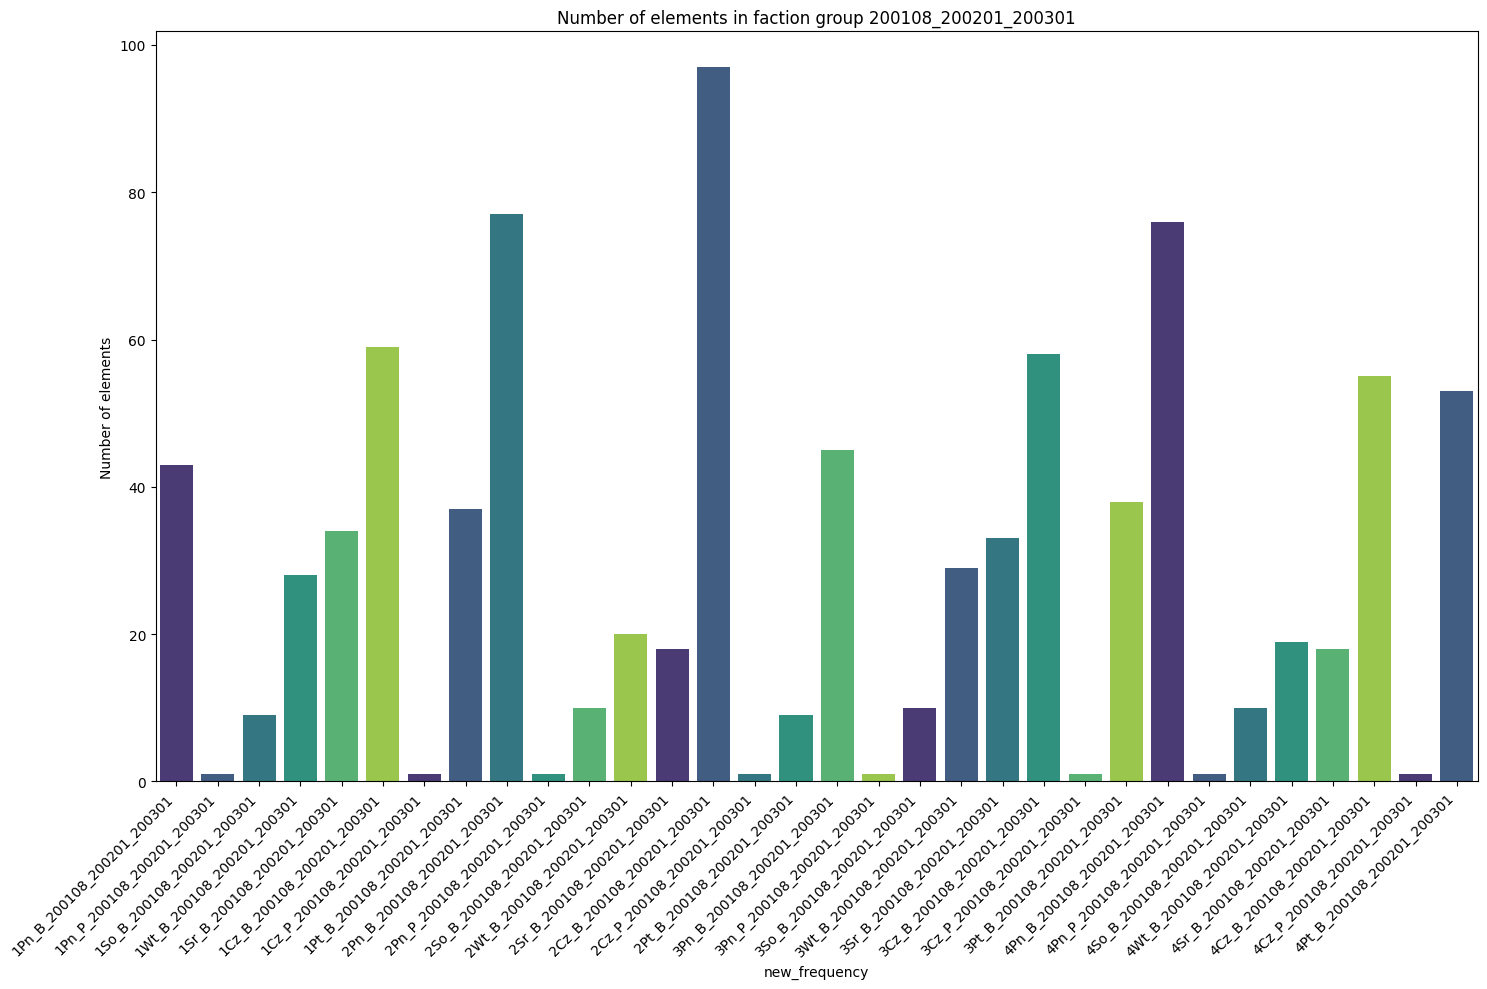

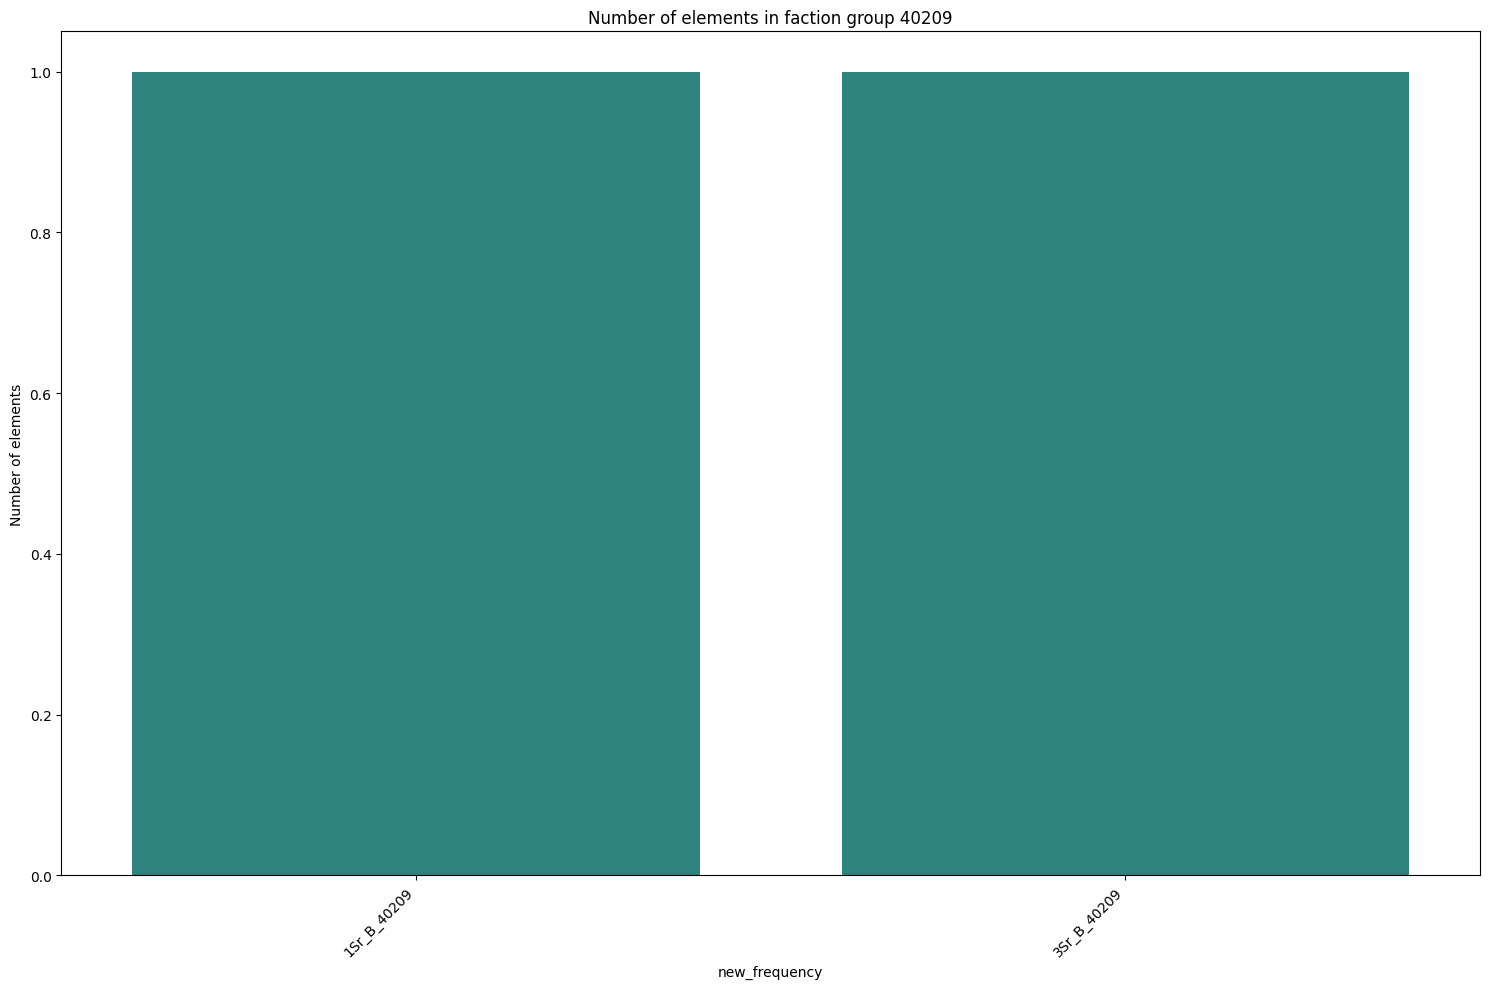

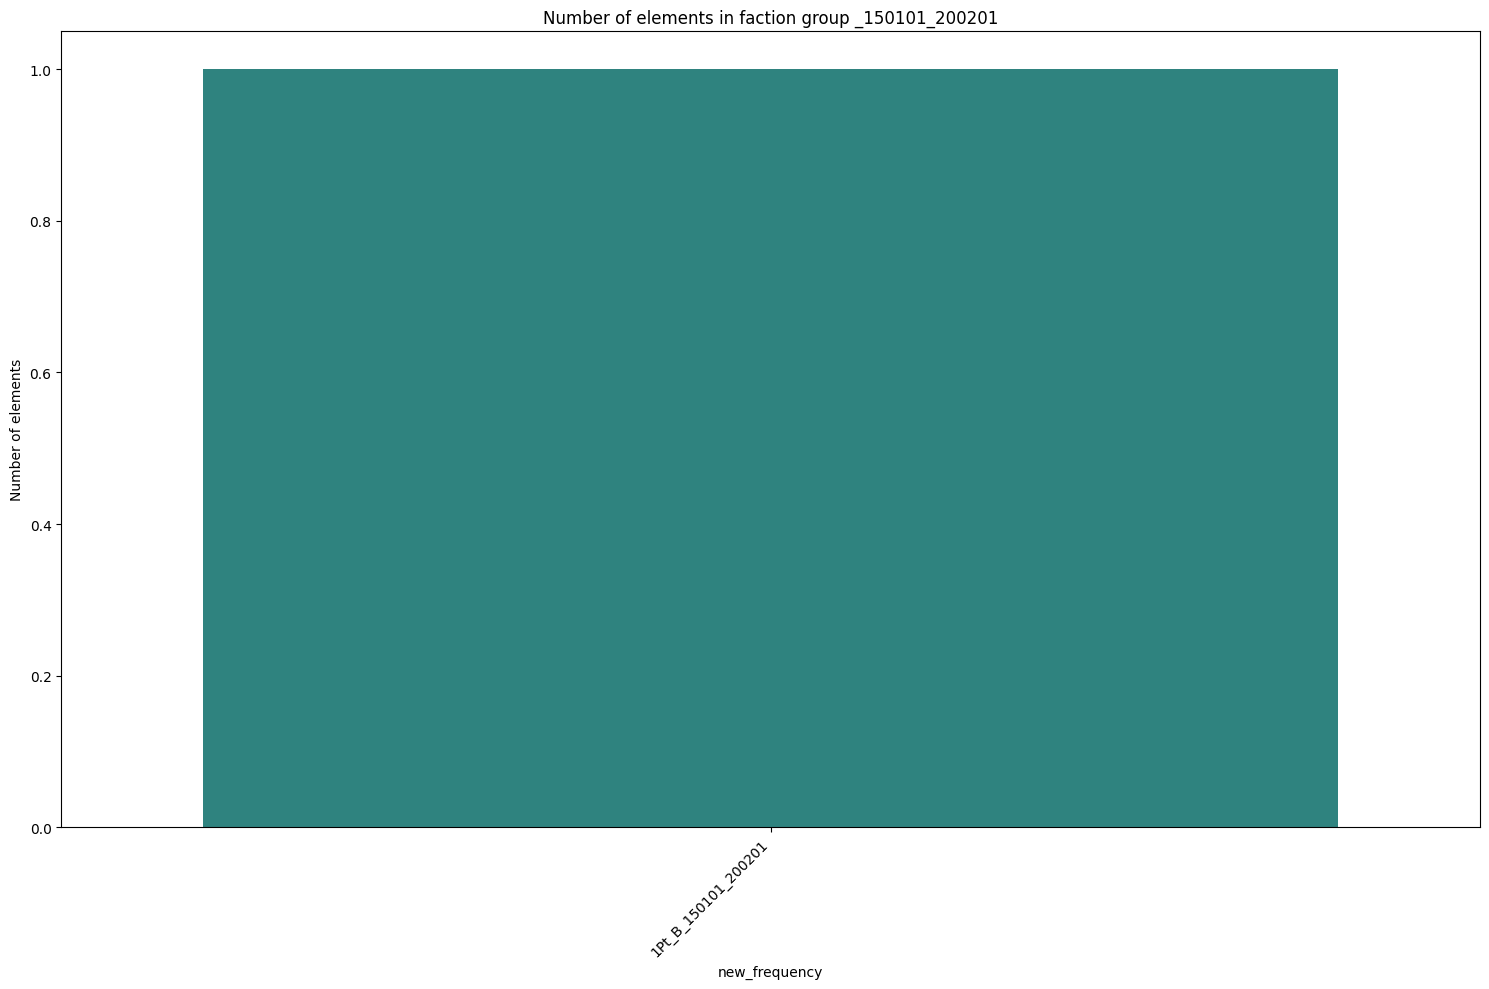

In [22]:
vks.plot_faction(new_data, x= "new_frequency")

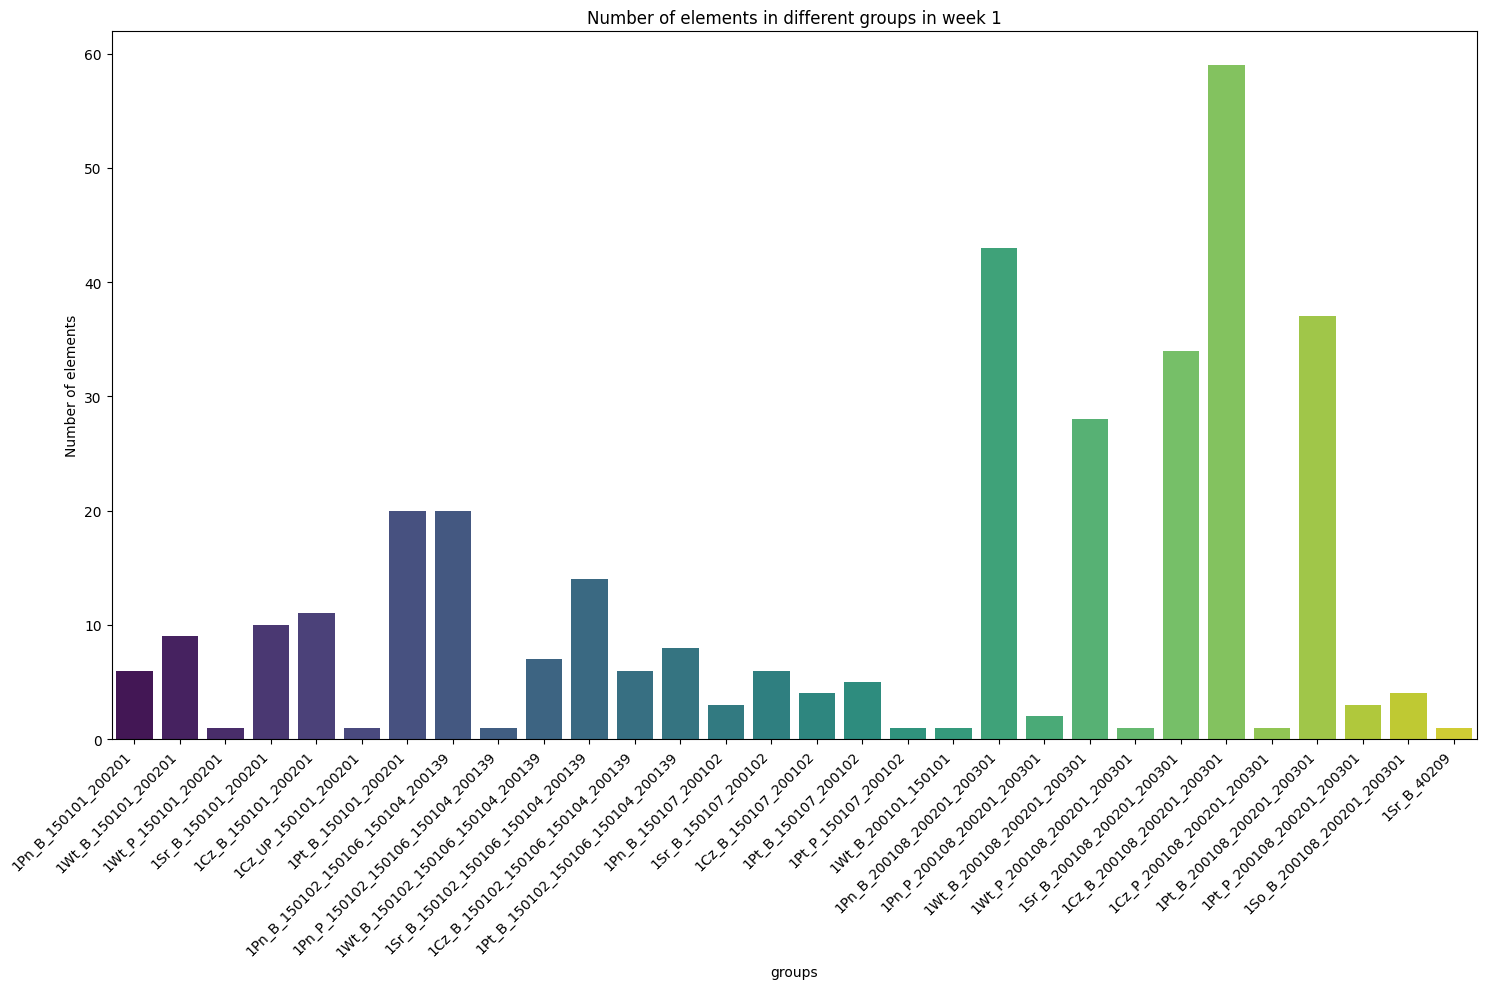

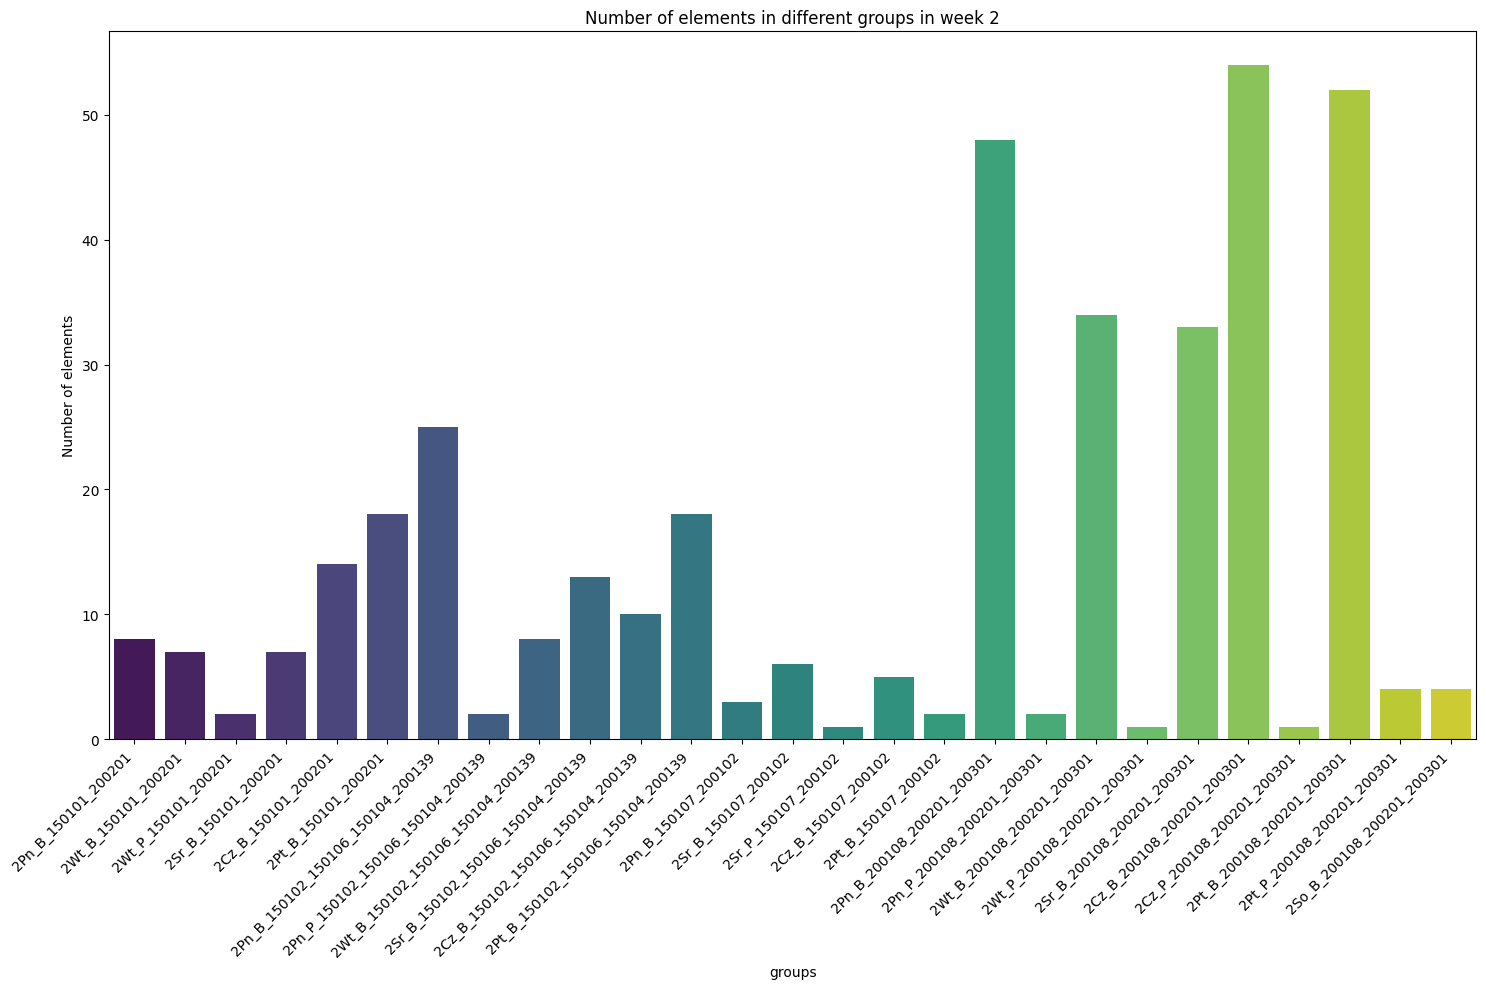

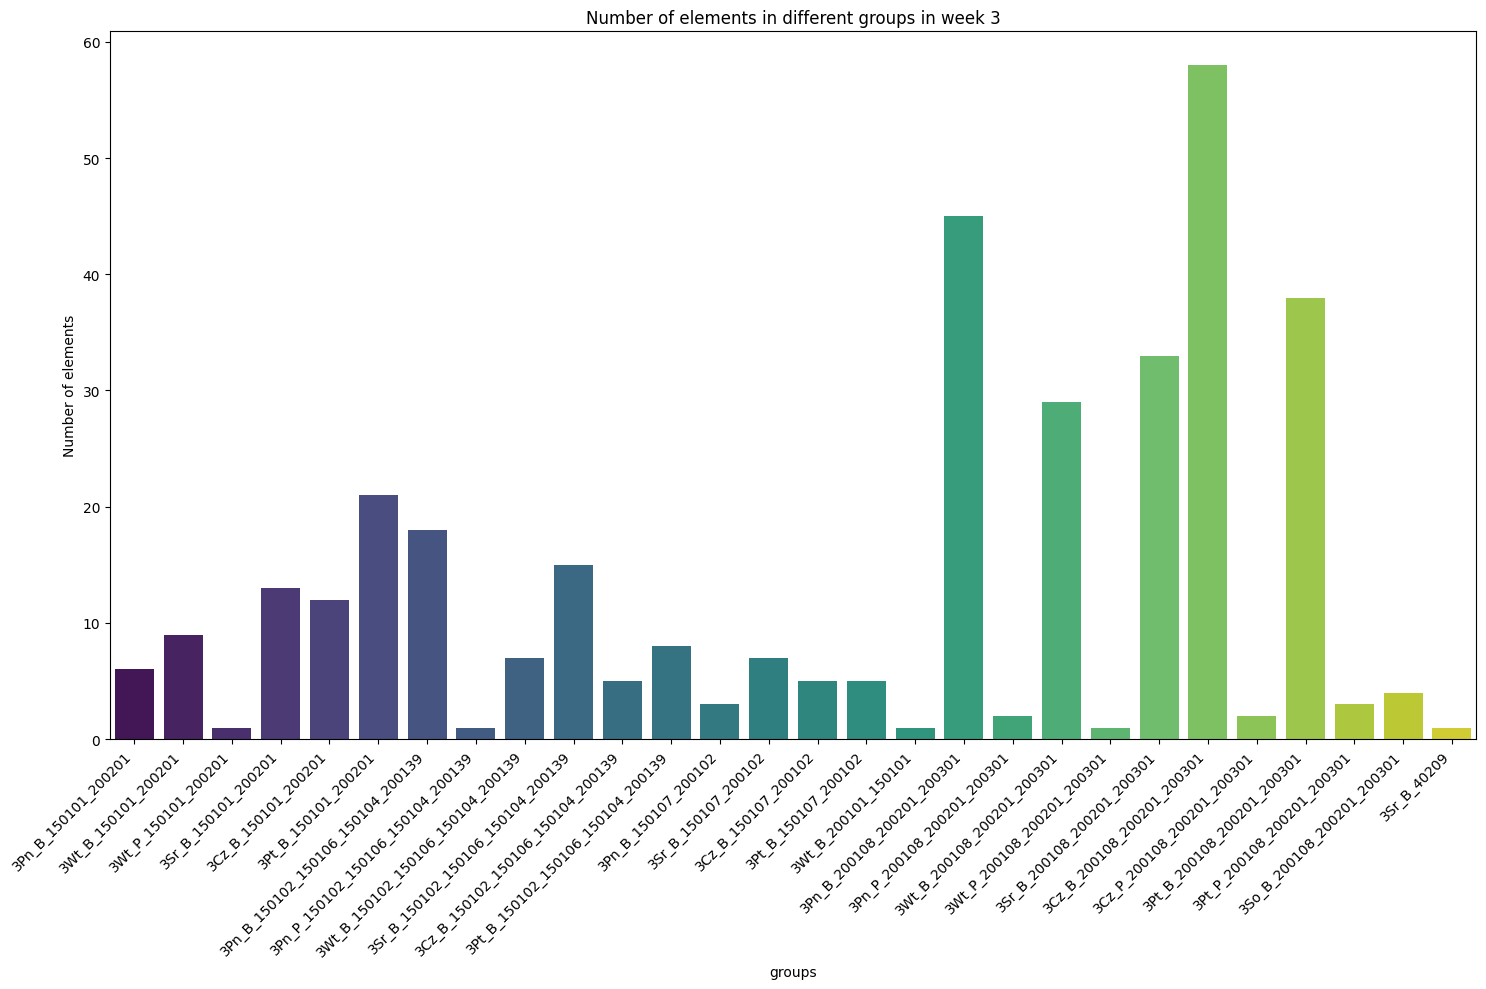

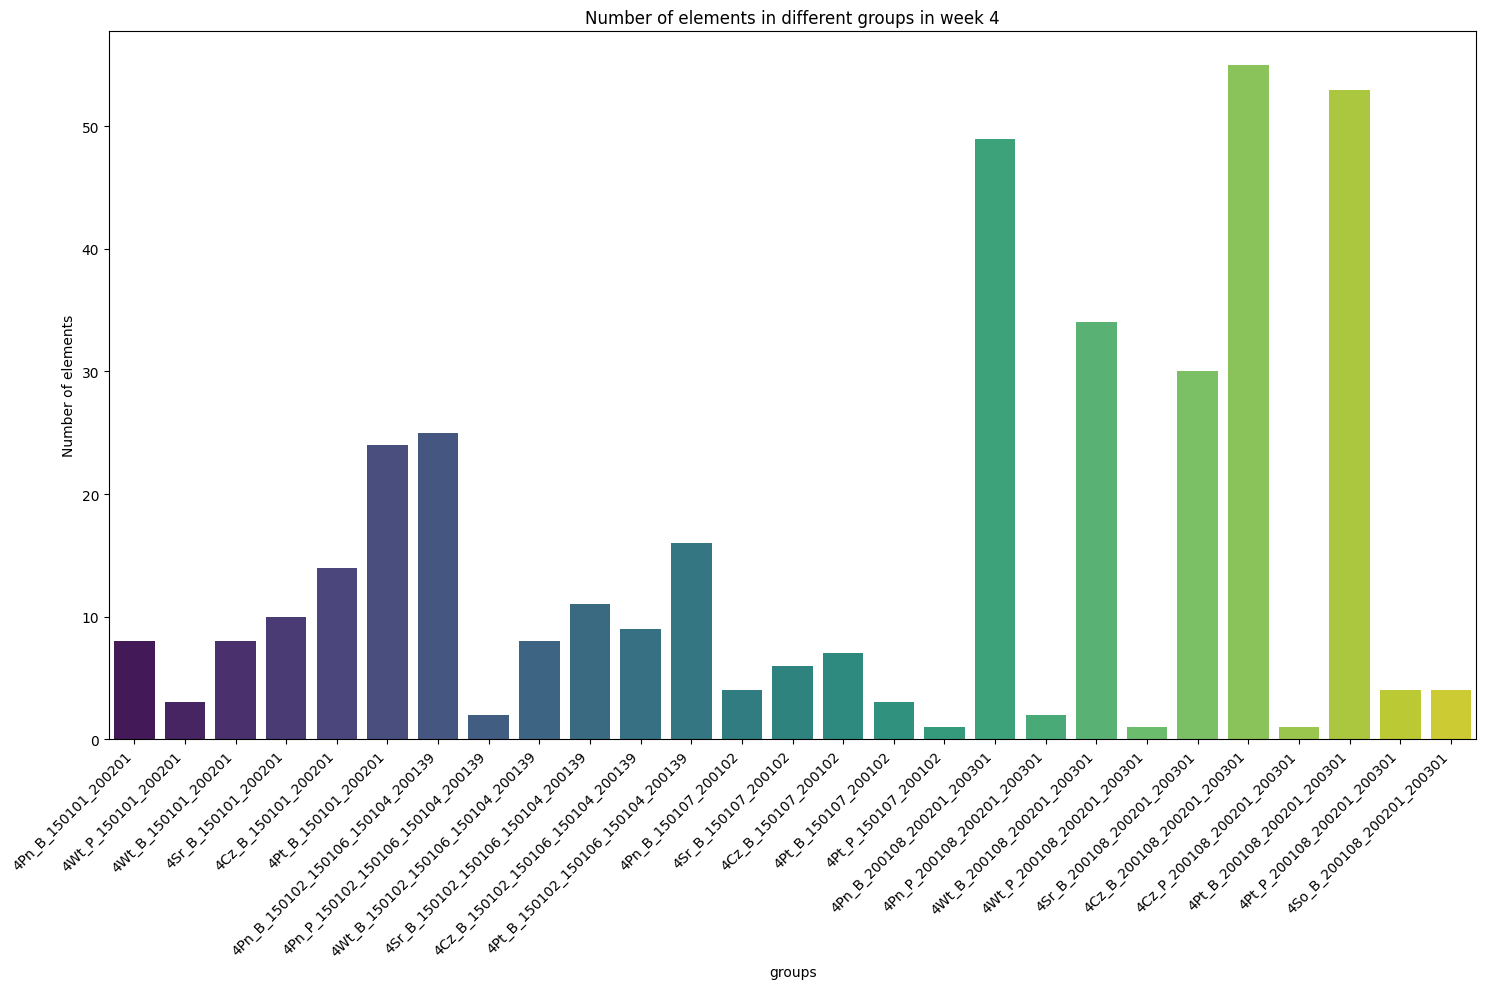

In [23]:
vks.plot_week(new_data)

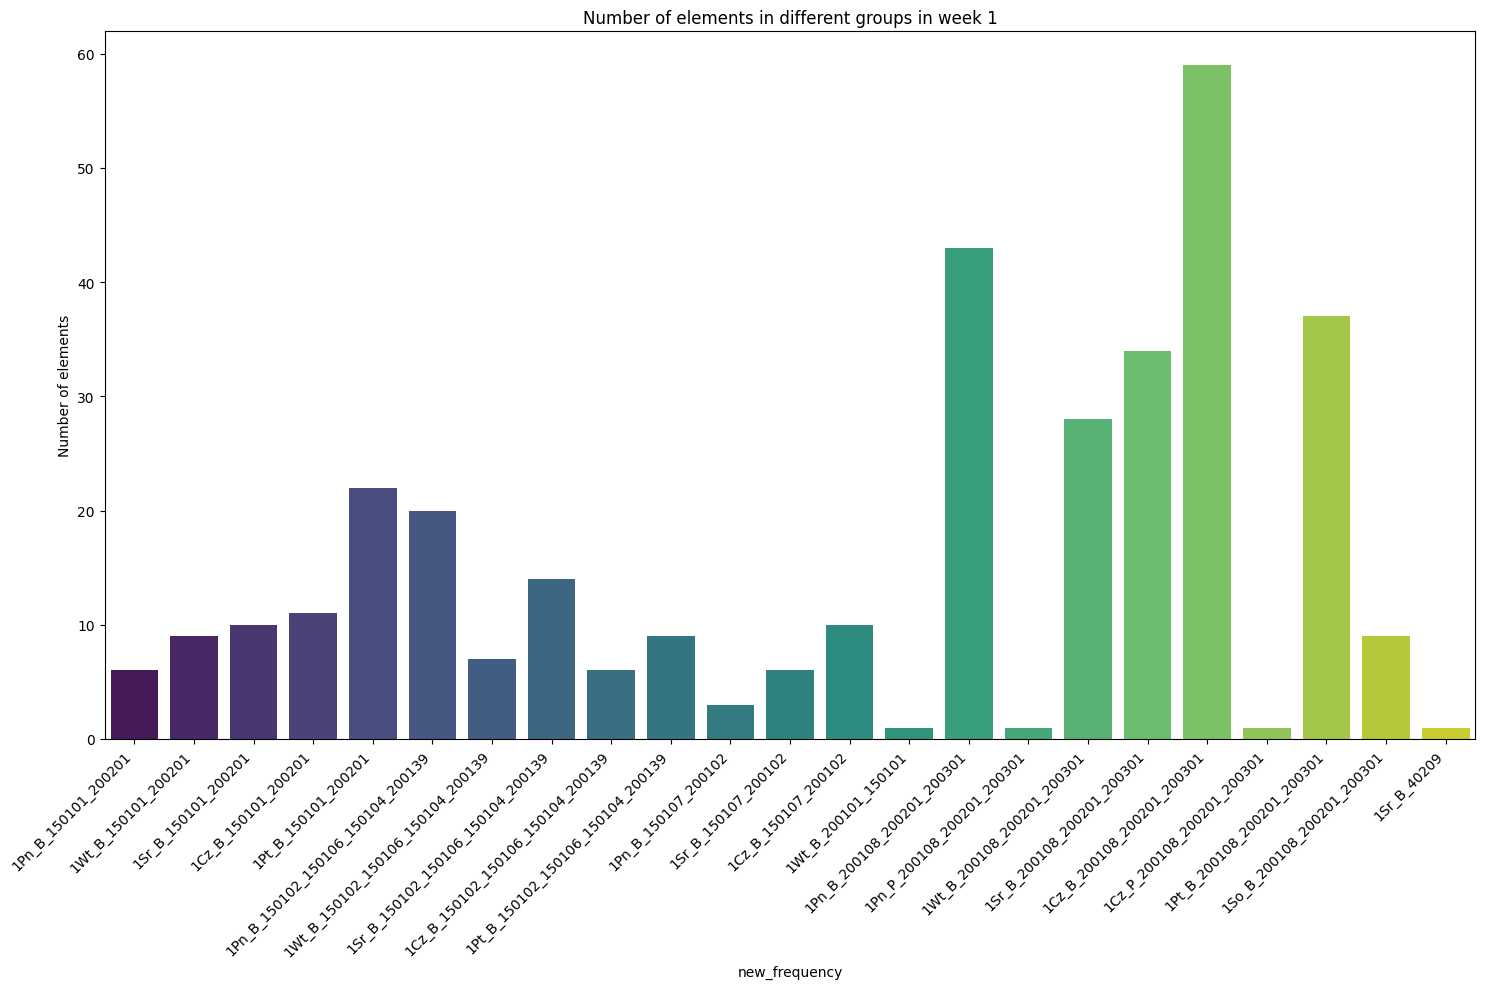

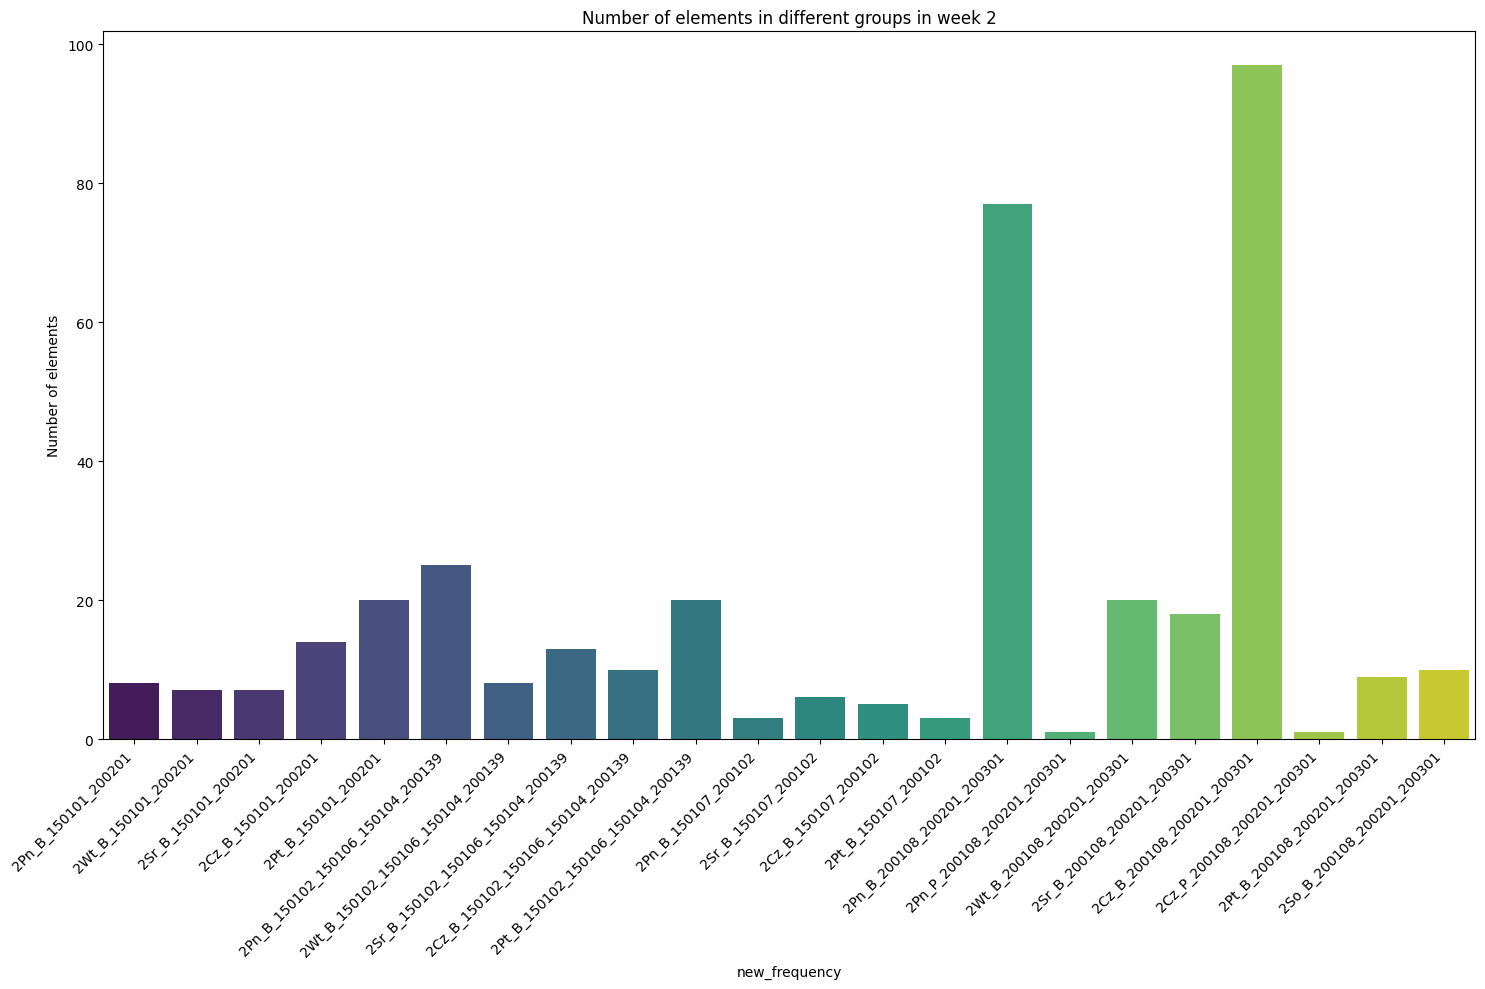

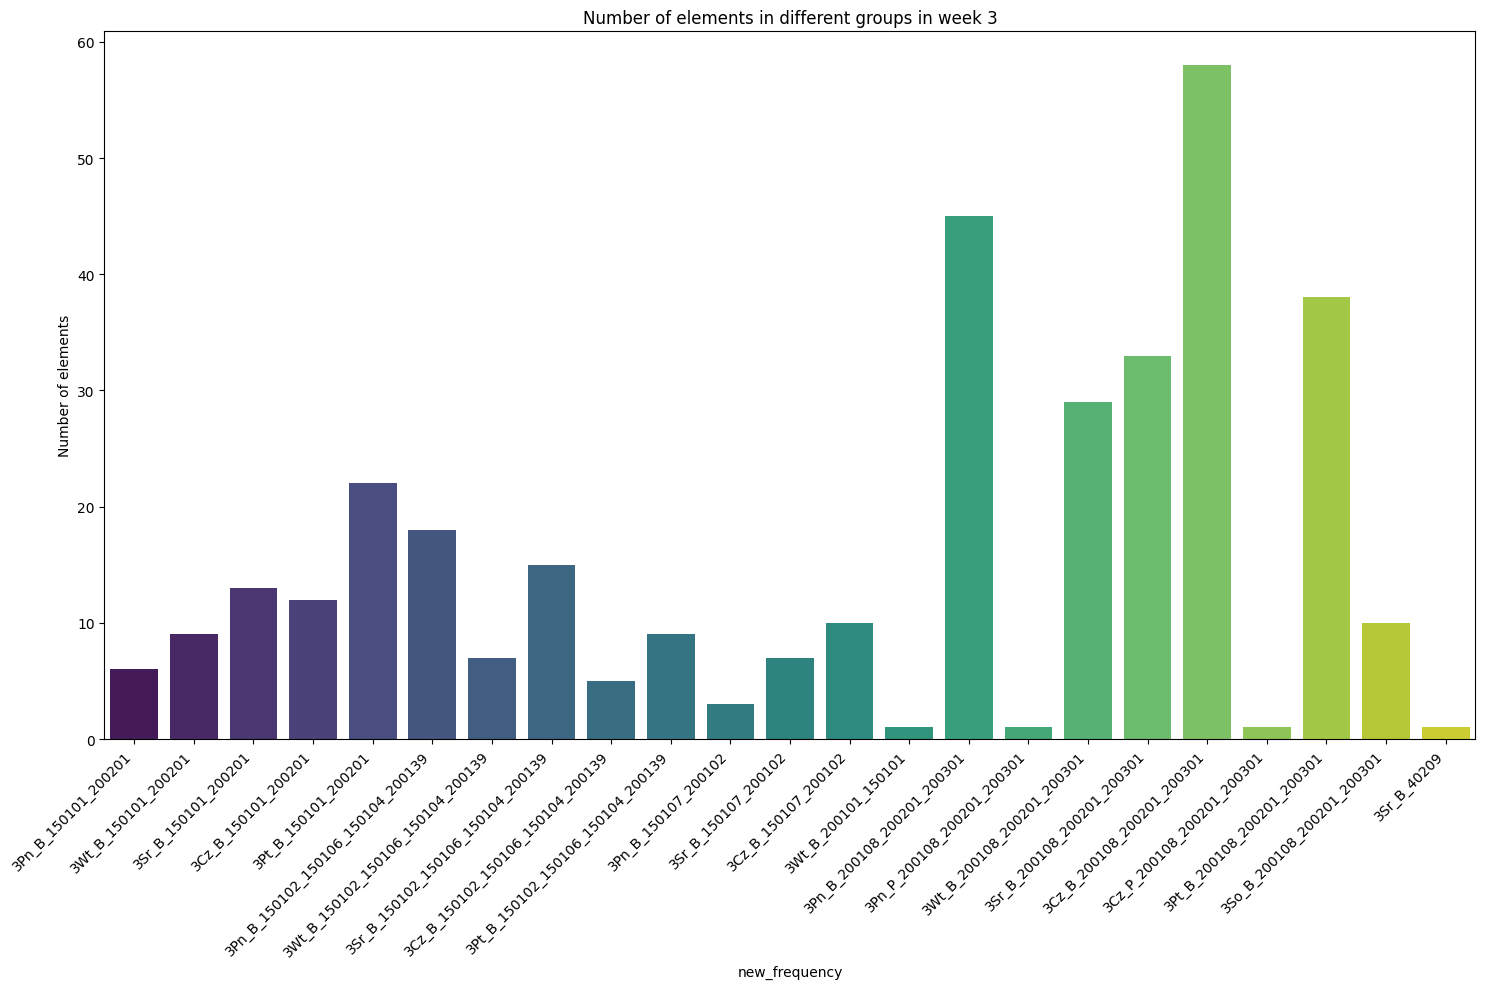

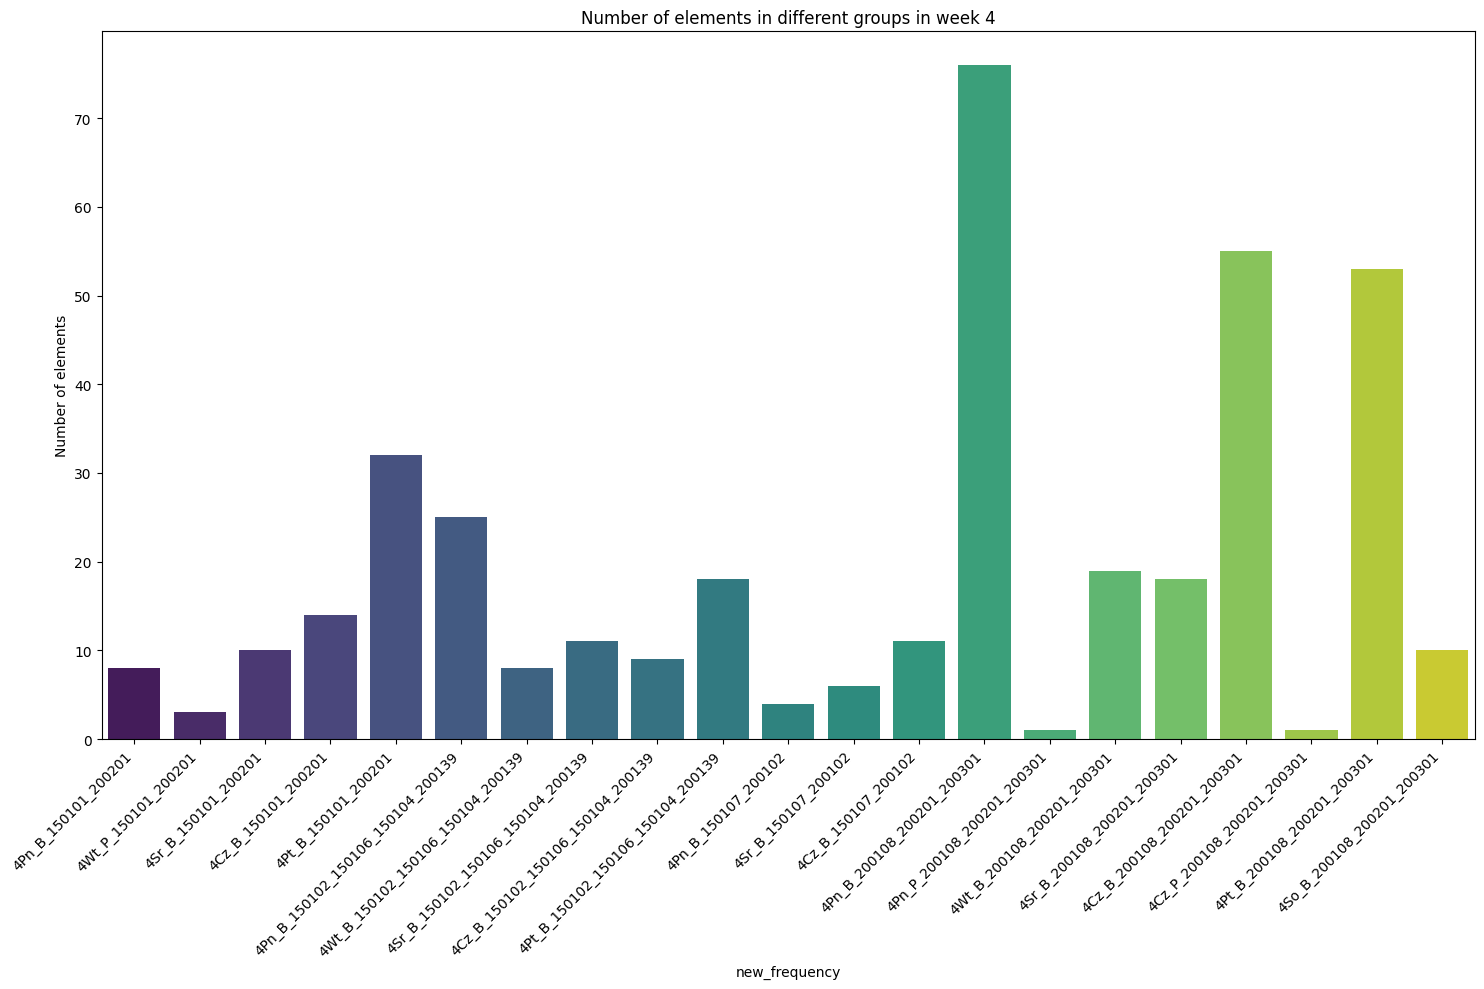

In [24]:
vks.plot_week(new_data, x= "new_frequency")